In [2]:
import pandas as pd
data_clean=pd.read_csv("BA_reviews.csv")

# Document term matrix

In [10]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english',min_df=1)
data_cv = cv.fit_transform(data_clean['review'])#transforming it to a mathematical form to make it machine understandable

data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())#converting to df
data_dtm.index = data_clean.index#setting index from original data
data_dtm

00  000  001  0027  0038  004  0053  0055  0058  00am  ...  zoo  zrh  \
0      0    0    0     0     0    0     0     0     0     0  ...    0    0   
1      0    0    0     0     0    0     0     0     0     0  ...    0    0   
2      0    0    0     0     0    0     0     0     0     0  ...    0    0   
3      1    0    0     0     0    0     0     0     0     0  ...    0    0   
4      0    0    0     0     0    0     0     0     0     0  ...    0    0   
...   ..  ...  ...   ...   ...  ...   ...   ...   ...   ...  ...  ...  ...   
3829   0    0    0     0     0    0     0     0     0     0  ...    0    0   
3830   0    0    0     0     0    0     0     0     0     0  ...    0    0   
3831   0    0    0     0     0    0     0     0     0     0  ...    0    0   
3832   0    0    0     0     0    0     0     0     0     0  ...    0    0   
3833   0    0    0     0     0    0     0     0     0     0  ...    0    0   

      zuletzt  zum  zurich  zusammenschluss  zzza  zürich  álex  über  
0           0    0       0                0     0       0     0     0  
1           0    0       0                0     0       0     0     0  
2           0    0       0                0     0       0     0     0  
3           0    0       0                0     0       0     0     0  
4           0    0       0                0     0       0     0     0  
...       ...  ...     ...              ...   ...     ...   ...   ...  
3829        0    0       0                0     0       0     0     0  
3830        0    0       0                0     0       0     0     0  
3831        0    0       0                0     0       0     0     0  
3832        0    0       0                0     0       0     0     0  
3833        0    0       0                0     0       0     0     0  

[3834 rows x 14013 columns]

In [11]:
cv

CountVectorizer(stop_words='english')

In [15]:
import pickle 
data_dtm.to_pickle("dtm.pkl")
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

# EDA

In [17]:
file  = open("dtm.pkl","rb")
dtm_df = pickle.load(file)
type(dtm_df)

pandas.core.frame.DataFrame

# printing top reviews for word block

In [18]:
top_30_words_per_row = pd.DataFrame(index=dtm_df.index, columns=range(30))

In [19]:
type(dtm_df)
for row_index in dtm_df.index:
    # Sort the words based on frequency in the current row
    # dtm_df.loc[row_index].sort_values(ascending=False) 
    # select a row and sort each row based on the frequency of words
    sorted_word_frequencies = dtm_df.loc[row_index].sort_values(ascending=False)
    
    print(sorted_word_frequencies)

flight           3
departure        1
complimentary    1
alcoholic        1
clean            1
                ..
downhill         0
download         0
downloaded       0
downmarket       0
über             0
Name: 0, Length: 14013, dtype: int64
crew           1
short          1
choice         1
praise         1
attentive      1
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 1, Length: 14013, dtype: int64
flight        9
british       6
connecting    5
boarding      5
airways       5
             ..
downs         0
downside      0
downsides     0
downsize      0
über          0
Name: 2, Length: 14013, dtype: int64
hours         4
passengers    3
told          3
ba            3
hotel         2
             ..
dozed         0
dozen         0
dozens        0
dpd           0
über          0
Name: 3, Length: 14013, dtype: int64
staff         2
plane         2
service       2
left          2
class         1
             ..
download

return         4
problem        3
australia      3
ba             3
year           2
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 77, Length: 14013, dtype: int64
seat             3
trip             3
extra            2
uncomfortable    2
ba               2
                ..
downgrading      0
downhill         0
download         0
downloaded       0
über             0
Name: 78, Length: 14013, dtype: int64
seat          4
madrid        3
apologies     2
just          2
mad           2
             ..
downmarket    0
downright     0
downs         0
downside      0
über          0
Name: 79, Length: 14013, dtype: int64
ba              2
compensation    2
months          2
statutory       1
nearly          1
               ..
downloaded      0
downmarket      0
downright       0
downs           0
über            0
Name: 80, Length: 14013, dtype: int64
ba             3
flight         2
room           1
schedule       1
available 

flight       4
ticket       3
original     3
pay          3
refund       3
            ..
downs        0
downside     0
downsides    0
downsize     0
über         0
Name: 136, Length: 14013, dtype: int64
bags          6
did           3
customer      2
ship          2
airport       2
             ..
downmarket    0
downright     0
downs         0
downside      0
über          0
Name: 137, Length: 14013, dtype: int64
flight        5
heathrow      3
time          3
ba            2
airport       2
             ..
downsize      0
downstairs    0
downtime      0
downtown      0
über          0
Name: 138, Length: 14013, dtype: int64
time          2
tasty         2
meaning       2
wasn          2
cpt           2
             ..
downmarket    0
downright     0
downs         0
downside      0
über          0
Name: 139, Length: 14013, dtype: int64
ba             2
flight         2
time           1
drinks         1
substituted    1
              ..
downgrade      0
downgraded     0
downgrades     

staff         2
extra         2
service       2
poor          1
appalling     1
             ..
downloaded    0
downmarket    0
downright     0
downs         0
über          0
Name: 201, Length: 14013, dtype: int64
ba           5
covid        2
route        2
sadly        2
trip         2
            ..
downright    0
downs        0
downside     0
downsides    0
über         0
Name: 202, Length: 14013, dtype: int64
flight         2
escalate       1
waiting        1
airline        1
complaints     1
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 203, Length: 14013, dtype: int64
check         4
offered       3
airport       3
flight        3
told          3
             ..
downside      0
downsides     0
downsize      0
downstairs    0
über          0
Name: 204, Length: 14013, dtype: int64
seat           4
good           4
seats          3
aircraft       3
time           2
              ..
downgrading    0
downhill       0
down

crew          3
way           2
helped        2
home          2
stressful     1
             ..
downfall      0
downgrade     0
downgraded    0
downgrades    0
über          0
Name: 276, Length: 14013, dtype: int64
people         3
check          3
checked        2
terrible       2
online         2
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 277, Length: 14013, dtype: int64
flight     8
ba         7
service    4
said       4
people     4
          ..
doyle      0
dozed      0
dozen      0
dozens     0
über       0
Name: 278, Length: 14013, dtype: int64
good           3
lounge         2
flight         2
status         1
arrival        1
              ..
downgrade      0
downgraded     0
downgrades     0
downgrading    0
über           0
Name: 279, Length: 14013, dtype: int64
seat          4
legroom       3
class         3
seats         2
block         2
             ..
downer        0
downfall      0
downgrade     0
downgra

good           3
ba             2
food           2
trip           2
pity           1
              ..
downgraded     0
downgrades     0
downgrading    0
downhill       0
über           0
Name: 346, Length: 14013, dtype: int64
planes        2
additional    2
seats         2
sitting       2
paid          1
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 347, Length: 14013, dtype: int64
milan         3
email         2
hour          2
24            2
did           2
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 348, Length: 14013, dtype: int64
economy        3
email          3
travel         2
alternative    2
flight         2
              ..
download       0
downloaded     0
downmarket     0
downright      0
über           0
Name: 349, Length: 14013, dtype: int64
lhr          2
flight       2
service      2
trip         1
cds          1
            ..
doubts       0
dowloaded    

ba           3
t5           3
food         3
lhr          3
working      3
            ..
downtown     0
downward     0
downwards    0
doyle        0
über         0
Name: 415, Length: 14013, dtype: int64
flight        2
notified      2
outbound      1
experience    1
horrible      1
             ..
downed        0
downer        0
downfall      0
downgrade     0
über          0
Name: 416, Length: 14013, dtype: int64
seat           2
overall        2
just           2
check          2
queue          2
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 417, Length: 14013, dtype: int64
customer      2
ba            2
service       2
worker        1
values        1
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 418, Length: 14013, dtype: int64
requested      2
trip           2
expenses       2
follow         1
sent           1
              ..
downgrades     0
downgrading    0
down

flight       5
cdg          3
did          3
took         2
airline      2
            ..
downright    0
downs        0
downside     0
downsides    0
über         0
Name: 486, Length: 14013, dtype: int64
flight         2
delayed        1
missed         1
connection     1
course         1
              ..
downgraded     0
downgrades     0
downgrading    0
downhill       0
über           0
Name: 487, Length: 14013, dtype: int64
british       2
delivered     2
days          2
promise       2
suitcase      2
             ..
downloaded    0
downmarket    0
downright     0
downs         0
über          0
Name: 488, Length: 14013, dtype: int64
flight       8
refund       7
customer     5
service      4
cancelled    3
            ..
drab         0
drabs        0
drag         0
dragged      0
über         0
Name: 489, Length: 14013, dtype: int64
ba           5
flight       3
told         3
customer     3
contact      3
            ..
downtime     0
downtown     0
downward     0
downwards    0
ü

ba                2
responsibility    1
surely            1
cause             1
chaos             1
                 ..
downmarket        0
downright         0
downs             0
downside          0
über              0
Name: 556, Length: 14013, dtype: int64
flight        7
clothes       5
london        5
days          5
dublin        5
             ..
downside      0
downsides     0
downsize      0
downstairs    0
über          0
Name: 557, Length: 14013, dtype: int64
time          2
club          2
food          2
menu          2
turned        1
             ..
downsides     0
downsize      0
downstairs    0
downtime      0
über          0
Name: 558, Length: 14013, dtype: int64
queue         7
did           5
check         5
online        4
ba            4
             ..
downsides     0
downsize      0
downstairs    0
downtime      0
über          0
Name: 559, Length: 14013, dtype: int64
cancelled      2
2022           1
bad            1
antalya        1
unexpected     1
           

check         4
ba            4
plane         3
lounge        2
slow          2
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 619, Length: 14013, dtype: int64
seat           1
desk           1
check          1
verified       1
queuing        1
              ..
downgrade      0
downgraded     0
downgrades     0
downgrading    0
über           0
Name: 620, Length: 14013, dtype: int64
row            3
food           3
12             2
seated         2
ba             2
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 621, Length: 14013, dtype: int64
just          3
pre           3
room          2
tenerife      2
lounge        2
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 622, Length: 14013, dtype: int64
flight        3
airline       2
pass          2
boarding      2
like          1
             ..
downhill      0
downlo

flight       4
club         4
europe       3
fresh        2
corona       2
            ..
downtime     0
downtown     0
downward     0
downwards    0
über         0
Name: 697, Length: 14013, dtype: int64
flight        5
check         3
santorini     3
closed        2
arrived       2
             ..
downsides     0
downsize      0
downstairs    0
downtime      0
über          0
Name: 698, Length: 14013, dtype: int64
paris         5
london        4
ba            4
late          3
arrived       3
             ..
downstairs    0
downtime      0
downtown      0
downward      0
über          0
Name: 699, Length: 14013, dtype: int64
flight        4
time          3
masks         3
allow         2
distancing    2
             ..
downs         0
downside      0
downsides     0
downsize      0
über          0
Name: 700, Length: 14013, dtype: int64
crackers       1
clean          1
social         1
deplaning      1
special        1
              ..
downgrades     0
downgrading    0
downhill       

cabin         3
flight        2
crew          2
baby          2
bulkhead      2
             ..
downloaded    0
downmarket    0
downright     0
downs         0
über          0
Name: 773, Length: 14013, dtype: int64
comair        3
meal          3
course        2
hot           2
followed      1
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 774, Length: 14013, dtype: int64
service       3
couple        2
club          2
sleep         2
world         2
             ..
downmarket    0
downright     0
downs         0
downside      0
über          0
Name: 775, Length: 14013, dtype: int64
flight        3
minutes       2
lounge        1
landing       1
kept          1
             ..
downmarket    0
downright     0
downs         0
downside      0
über          0
Name: 776, Length: 14013, dtype: int64
flight        6
flights       4
boeing        4
time          3
ba            3
             ..
downloaded    0
downmarket    0
downright   

delayed       1
flight        1
verified      1
host          1
service       1
             ..
downfall      0
downgrade     0
downgraded    0
downgrades    0
über          0
Name: 830, Length: 14013, dtype: int64
far           3
ba            3
service       3
used          2
time          2
             ..
downsides     0
downsize      0
downstairs    0
downtime      0
über          0
Name: 831, Length: 14013, dtype: int64
flight        4
described     2
connecting    2
mix           2
delayed       2
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 832, Length: 14013, dtype: int64
staff          2
meal           2
service        2
great          2
mediocre       1
              ..
downgrade      0
downgraded     0
downgrades     0
downgrading    0
über           0
Name: 833, Length: 14013, dtype: int64
flight       4
verified     1
economy      1
fairly       1
west         1
            ..
downed       0
downer       0
downfall 

gatwick      4
flight       3
tampa        2
seats        2
glasgow      2
            ..
downright    0
downs        0
downsides    0
downsize     0
über         0
Name: 906, Length: 14013, dtype: int64
aircraft      3
cabin         2
extremely     1
croissant     1
broken        1
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 907, Length: 14013, dtype: int64
good           4
etihad         3
flight         3
london         2
especially     2
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 908, Length: 14013, dtype: int64
seat           3
food           2
european       1
30             1
half           1
              ..
downgraded     0
downgrades     0
downgrading    0
downhill       0
über           0
Name: 909, Length: 14013, dtype: int64
class         3
economy       3
flight        2
price         2
meals         2
             ..
downloaded    0
downmarket    0
d

fine         3
flight       3
return       3
lounge       2
dublin       2
            ..
dowloaded    0
downed       0
downer       0
downfall     0
über         0
Name: 971, Length: 14013, dtype: int64
crew         4
partner      4
service      4
pasta        4
chicken      3
            ..
downright    0
downs        0
downside     0
downsides    0
über         0
Name: 972, Length: 14013, dtype: int64
cabin          2
flight         2
airways        2
crew           2
british        2
              ..
downgraded     0
downgrades     0
downgrading    0
downhill       0
über           0
Name: 973, Length: 14013, dtype: int64
trip          4
madrid        3
ba            2
london        2
plane         2
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 974, Length: 14013, dtype: int64
flying         2
ba             2
amazing        2
overall        1
thanks         1
              ..
downgraded     0
downgrades     0
downgrading    

flight         2
verified       1
thank          1
enjoyed        1
impeccable     1
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 1035, Length: 14013, dtype: int64
trip          2
really        1
london        1
vancouver     1
staff         1
             ..
downfall      0
downgrade     0
downgraded    0
downgrades    0
über          0
Name: 1036, Length: 14013, dtype: int64
appreciated    1
selecting      1
expected       1
crew           1
miami          1
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 1037, Length: 14013, dtype: int64
problem        3
water          2
drink          2
requested      2
left           2
              ..
downgrade      0
downgraded     0
downgrades     0
downgrading    0
über           0
Name: 1038, Length: 14013, dtype: int64
business     3
class        3
trip         2
seats        2
air          2
            ..
downs        

check          2
british        2
airways        2
going          2
flight         2
              ..
downgraded     0
downgrades     0
downgrading    0
downhill       0
über           0
Name: 1104, Length: 14013, dtype: int64
diego         3
san           3
check         3
tried         2
aisle         2
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 1105, Length: 14013, dtype: int64
baggage        4
airways        2
lost           2
british        2
phone          1
              ..
downgraded     0
downgrades     0
downgrading    0
downhill       0
über           0
Name: 1106, Length: 14013, dtype: int64
flight        4
care          3
just          3
business      3
phone         2
             ..
downloaded    0
downmarket    0
downright     0
downs         0
über          0
Name: 1107, Length: 14013, dtype: int64
cdg           2
paris         2
minutes       1
40            1
trip          1
             ..
downfall      0
do

tickets        3
october        3
refund         3
grandfather    3
airline        2
              ..
downmarket     0
downright      0
downs          0
downside       0
über           0
Name: 1169, Length: 14013, dtype: int64
quality        3
flight         2
gatwick        2
relaxed        1
long           1
              ..
downgrade      0
downgraded     0
downgrades     0
downgrading    0
über           0
Name: 1170, Length: 14013, dtype: int64
economy       3
premium       2
seat          2
breakfast     2
sealed        2
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 1171, Length: 14013, dtype: int64
staff         2
check         2
phoenix       2
london        2
great         2
             ..
downfall      0
downgrade     0
downgraded    0
downgrades    0
über          0
Name: 1172, Length: 14013, dtype: int64
flight        2
offered       2
attendant     2
apology       2
staff         2
             ..
download      0
do

did            2
flight         2
departed       1
bumpy          1
trip           1
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 1233, Length: 14013, dtype: int64
travelling    3
ba            3
flights       3
toronto       2
family        2
             ..
downright     0
downs         0
downside      0
downsides     0
über          0
Name: 1234, Length: 14013, dtype: int64
service        2
lower          2
planes         2
miss           2
customer       1
              ..
downgrade      0
downgraded     0
downgrades     0
downgrading    0
über           0
Name: 1235, Length: 14013, dtype: int64
tea            4
asked          2
said           2
time           1
trip           1
              ..
downgraded     0
downgrades     0
downgrading    0
downhill       0
über           0
Name: 1236, Length: 14013, dtype: int64
ok           5
crew         4
ife          3
lasagne      2
pretty       2
            ..
downwards    

flight        7
did           3
arrive        3
time          2
taxi          2
             ..
downstairs    0
downtime      0
downtown      0
downward      0
über          0
Name: 1298, Length: 14013, dtype: int64
bag            3
horrible       2
london         2
email          2
pm             2
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 1299, Length: 14013, dtype: int64
choice        4
told          3
given         3
asked         3
poor          2
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 1300, Length: 14013, dtype: int64
food          4
club          3
blanket       3
new           3
used          2
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 1301, Length: 14013, dtype: int64
flight        4
quality       2
25            1
aircraft      1
better        1
             ..
downloaded    0
downmarket   

passengers        3
crew              2
delay             2
economy           2
disembarkation    2
                 ..
download          0
downloaded        0
downmarket        0
downright         0
über              0
Name: 1364, Length: 14013, dtype: int64
eurowings      2
table          1
room           1
fly            1
comparison     1
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 1365, Length: 14013, dtype: int64
working       2
food          2
iberia        2
madrid        2
staff         2
             ..
downer        0
downfall      0
downgrade     0
downgraded    0
über          0
Name: 1366, Length: 14013, dtype: int64
flight        6
seat          5
like          5
club          5
day           4
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 1367, Length: 14013, dtype: int64
ba             4
service        3
american       3
miami          2
north        

time           1
cabin          1
ba             1
london         1
seating        1
              ..
downgrade      0
downgraded     0
downgrades     0
downgrading    0
über           0
Name: 1430, Length: 14013, dtype: int64
pretzel       3
cheese        3
cream         3
breakfast     3
just          2
             ..
downmarket    0
downright     0
downs         0
downside      0
über          0
Name: 1431, Length: 14013, dtype: int64
really        2
flight        2
excited       1
polite        1
definitely    1
             ..
downer        0
downfall      0
downgrade     0
downgraded    0
über          0
Name: 1432, Length: 14013, dtype: int64
flights      5
lhr          4
ba           3
flight       3
seats        3
            ..
downright    0
downs        0
downside     0
downsides    0
über         0
Name: 1433, Length: 14013, dtype: int64
british       3
care          3
customer      3
airways       3
hours         3
             ..
downfall      0
downgrade     0
downgrad

boarding       4
fast           3
plane          3
track          2
queue          2
              ..
downgraded     0
downgrades     0
downgrading    0
downhill       0
über           0
Name: 1503, Length: 14013, dtype: int64
flight       7
12           4
pass         4
00           3
told         3
            ..
downtown     0
downward     0
downwards    0
doyle        0
über         0
Name: 1504, Length: 14013, dtype: int64
ba             4
flight         3
fly            2
low            1
instead        1
              ..
downgrade      0
downgraded     0
downgrades     0
downgrading    0
über           0
Name: 1505, Length: 14013, dtype: int64
really         5
business       2
class          2
trip           2
airways        2
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 1506, Length: 14013, dtype: int64
people        3
hours         3
sleep         2
sydney        2
crew          2
             ..
download      0
do

quality       3
malaga        2
food          2
terminal      2
flight        2
             ..
downmarket    0
downright     0
downs         0
downside      0
über          0
Name: 1568, Length: 14013, dtype: int64
flight       8
ba           5
outbound     4
ticket       3
cancelled    3
            ..
downtime     0
downtown     0
downward     0
downwards    0
über         0
Name: 1569, Length: 14013, dtype: int64
seat        8
seats       7
business    6
service     6
class       6
           ..
dozen       0
dozens      0
dpd         0
drab        0
über        0
Name: 1570, Length: 14013, dtype: int64
seat           5
window         4
ba             2
economy        2
premium        2
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 1571, Length: 14013, dtype: int64
good         7
quick        3
flight       3
aircraft     2
bags         2
            ..
downs        0
downside     0
downsides    0
downsize     0
über    

ba            4
say           3
athens        3
flight        3
later         3
             ..
downsize      0
downstairs    0
downtime      0
downtown      0
über          0
Name: 1636, Length: 14013, dtype: int64
ok            4
premium       2
flight        2
business      2
north         1
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 1637, Length: 14013, dtype: int64
flight         9
passengers     5
airline        5
customer       3
ba             3
              ..
draining       0
drains         0
drakensberg    0
drama          0
über           0
Name: 1638, Length: 14013, dtype: int64
flight      9
handling    6
agents      5
terminal    5
ground      4
           ..
dozen       0
dozens      0
dpd         0
drab        0
über        0
Name: 1639, Length: 14013, dtype: int64
crew         2
business     2
ba           2
aircraft     2
need         1
            ..
downs        0
downside     0
downsides    0
downsize    

service        2
staff          2
boarding       2
ba             2
cabin          2
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 1699, Length: 14013, dtype: int64
board         2
stockholm     2
buy           2
service       2
ba            2
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 1700, Length: 14013, dtype: int64
bag           3
cabin         2
crew          2
luggage       2
overheads     2
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 1701, Length: 14013, dtype: int64
product       4
flight        2
tired         2
business      2
month         2
             ..
downloaded    0
downmarket    0
downright     0
downs         0
über          0
Name: 1702, Length: 14013, dtype: int64
nice           2
leather        2
seats          2
akin           1
review         1
              ..
downgraded     0
downgr

flight       7
business     5
seat         4
ba           4
long         4
            ..
downright    0
downs        0
downside     0
downsides    0
über         0
Name: 1768, Length: 14013, dtype: int64
santorini      2
seats          2
customers      2
gone           2
paid           1
              ..
downgrade      0
downgraded     0
downgrades     0
downgrading    0
über           0
Name: 1769, Length: 14013, dtype: int64
flight         2
recently       2
short          2
cost           2
haul           2
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 1770, Length: 14013, dtype: int64
better        3
class         3
hours         2
standard      2
economy       2
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 1771, Length: 14013, dtype: int64
edinburgh      2
like           2
flight         2
checked        1
didn           1
              ..
downgrades     0
downgr

flight        3
cost          3
airline       3
pay           3
ba            3
             ..
downsize      0
downstairs    0
downtime      0
downtown      0
über          0
Name: 1836, Length: 14013, dtype: int64
ba             2
bag            2
just           2
economy        2
boarding       2
              ..
downgrade      0
downgraded     0
downgrades     0
downgrading    0
über           0
Name: 1837, Length: 14013, dtype: int64
business      6
class         6
seat          5
nice          4
ba            4
             ..
downsides     0
downsize      0
downstairs    0
downtime      0
über          0
Name: 1838, Length: 14013, dtype: int64
mr           3
ba           3
gatwick      2
toast        2
cheese       2
            ..
downs        0
downside     0
downsides    0
downsize     0
über         0
Name: 1839, Length: 14013, dtype: int64
food           3
felt           2
hit            1
female         1
squashed       1
              ..
downgraded     0
downgrades     0


did           2
time          2
disappoint    1
facilities    1
check         1
             ..
downfall      0
downgrade     0
downgraded    0
downgrades    0
über          0
Name: 1900, Length: 14013, dtype: int64
meal          3
lounge        2
ba            2
emerald       2
drink         2
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 1901, Length: 14013, dtype: int64
boarding      2
airways       2
seats         2
track         2
british       2
             ..
downmarket    0
downright     0
downs         0
downside      0
über          0
Name: 1902, Length: 14013, dtype: int64
air            2
just           2
montreal       2
price          2
canada         2
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 1903, Length: 14013, dtype: int64
ba            4
worn          2
london        2
headphones    2
used          2
             ..
downs         0
downside     

children      2
plane         2
fault         2
airways       2
drink         2
             ..
downloaded    0
downmarket    0
downright     0
downs         0
über          0
Name: 1965, Length: 14013, dtype: int64
selection     2
ba            2
great         2
hold          2
ask           2
             ..
downside      0
downsides     0
downsize      0
downstairs    0
über          0
Name: 1966, Length: 14013, dtype: int64
service       2
cabin         2
bags          2
overhead      2
took          1
             ..
downmarket    0
downright     0
downs         0
downside      0
über          0
Name: 1967, Length: 14013, dtype: int64
flight        12
staff          3
choice         3
airlines       3
snacks         3
              ..
downstairs     0
downtime       0
downtown       0
downward       0
über           0
Name: 1968, Length: 14013, dtype: int64
seats        4
told         4
refund       4
customer     3
aisle        2
            ..
downtown     0
downward     0
downw

amman         3
london        3
class         1
spacious      1
passengers    1
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 2026, Length: 14013, dtype: int64
outbound     3
return       2
a320         2
good         2
inbound      1
            ..
downright    0
downs        0
downside     0
downsides    0
über         0
Name: 2027, Length: 14013, dtype: int64
british       3
airways       3
class         2
care          2
really        1
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 2028, Length: 14013, dtype: int64
sandwich     4
return       3
small        3
hours        3
economy      3
            ..
downs        0
downside     0
downsides    0
downsize     0
über         0
Name: 2029, Length: 14013, dtype: int64
work           2
didn           2
metal          1
slanted        1
room           1
              ..
downgrades     0
downgrading    0
downhill       0
downl

given        5
flight       3
service      3
emirates     2
flew         2
            ..
downs        0
downside     0
downsides    0
downsize     0
über         0
Name: 2093, Length: 14013, dtype: int64
flight        3
access        3
ba            2
minutes       2
lounges       2
             ..
downloaded    0
downmarket    0
downright     0
downs         0
über          0
Name: 2094, Length: 14013, dtype: int64
child          7
seat           4
sleeping       2
flight         2
head           2
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 2095, Length: 14013, dtype: int64
little        3
carried       2
british       2
passengers    2
airways       2
             ..
downsides     0
downsize      0
downstairs    0
downtime      0
über          0
Name: 2096, Length: 14013, dtype: int64
seat           4
middle         2
ba             2
showed         1
rude           1
              ..
downgraded     0
downgrades     0


food           1
malaga         1
know           1
seat           1
reducing       1
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 2162, Length: 14013, dtype: int64
flight        4
time          3
upgraded      2
premium       2
rest          2
             ..
downfall      0
downgrade     0
downgraded    0
downgrades    0
über          0
Name: 2163, Length: 14013, dtype: int64
flight        11
time           7
cabin          6
crew           5
ba             3
              ..
downloaded     0
downmarket     0
downright      0
downs          0
über           0
Name: 2164, Length: 14013, dtype: int64
great          2
flight         2
captain        1
easyjet        1
issues         1
              ..
downgraded     0
downgrades     0
downgrading    0
downhill       0
über           0
Name: 2165, Length: 14013, dtype: int64
ba           13
card          4
codeshare     4
holder        3
singapore     3
             ..
dozen  

crew          4
service       3
cabin         2
received      2
hours         2
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 2236, Length: 14013, dtype: int64
ba            4
lounge        3
delayed       2
flights       2
gatwick       2
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 2237, Length: 14013, dtype: int64
ba            4
time          3
food          3
good          3
767           2
             ..
downsides     0
downsize      0
downstairs    0
downtime      0
über          0
Name: 2238, Length: 14013, dtype: int64
ba            3
given         3
singapore     3
flight        3
pay           3
             ..
downloaded    0
downmarket    0
downright     0
downs         0
über          0
Name: 2239, Length: 14013, dtype: int64
class         5
crew          4
minutes       4
hot           3
dry           2
             ..
downloaded    0
downmarket    0
downrigh

seat         9
world        4
traveller    4
vod          3
british      2
            ..
downwards    0
doyle        0
dozed        0
dozen        0
über         0
Name: 2308, Length: 14013, dtype: int64
generally     2
class         2
flew          2
value         2
forward       2
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 2309, Length: 14013, dtype: int64
entertainment    3
ba               3
upgrade          2
flying           2
british          2
                ..
downgraded       0
downgrades       0
downgrading      0
downhill         0
über             0
Name: 2310, Length: 14013, dtype: int64
lisbon         3
board          2
london         2
flight         2
hours          2
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 2311, Length: 14013, dtype: int64
flight        4
service       2
customer      2
british       1
70            1
             ..
downhil

check         3
time          2
warsaw        1
late          1
shop          1
             ..
downfall      0
downgrade     0
downgraded    0
downgrades    0
über          0
Name: 2384, Length: 14013, dtype: int64
queue         7
new           2
people        2
line          2
person        2
             ..
downside      0
downsides     0
downsize      0
downstairs    0
über          0
Name: 2385, Length: 14013, dtype: int64
british       3
price         2
years         1
screen        1
haul          1
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 2386, Length: 14013, dtype: int64
flight         3
slow           2
ibiza          2
late           2
good           2
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 2387, Length: 14013, dtype: int64
longer         2
class          2
counter        2
business       2
queue          2
              ..
downgrades     0
downgr

flight         3
larnaca        2
seating        2
compared       2
attendants     1
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 2463, Length: 14013, dtype: int64
london        2
ba            2
flight        2
man           2
isle          2
             ..
downfall      0
downgrade     0
downgraded    0
downgrades    0
über          0
Name: 2464, Length: 14013, dtype: int64
ba             3
flight         2
really         2
route          2
worn           1
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 2465, Length: 14013, dtype: int64
flight        3
lcy           3
excellent     2
onboard       2
service       2
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 2466, Length: 14013, dtype: int64
flight         3
service        2
berlin         2
excellent      2
seat           1
              ..
downgrading 

plane         4
flight        3
screen        2
years         2
need          1
             ..
downmarket    0
downright     0
downs         0
downside      0
über          0
Name: 2532, Length: 14013, dtype: int64
cabin          2
time           1
rude           1
tired          1
issues         1
              ..
downgrade      0
downgraded     0
downgrades     0
downgrading    0
über           0
Name: 2533, Length: 14013, dtype: int64
flight    4
class     4
new       4
1st       3
a380      3
         ..
dozen     0
dozens    0
dpd       0
drab      0
über      0
Name: 2534, Length: 14013, dtype: int64
screens       2
work          1
roof          1
half          1
problem       1
             ..
downfall      0
downgrade     0
downgraded    0
downgrades    0
über          0
Name: 2535, Length: 14013, dtype: int64
flight        6
did           6
food          3
attendant     3
just          3
             ..
downsize      0
downstairs    0
downtime      0
downtown      0
über     

return         3
london         3
bucharest      2
heathrow       2
good           2
              ..
downgraded     0
downgrades     0
downgrading    0
downhill       0
über           0
Name: 2595, Length: 14013, dtype: int64
service    3
class      3
british    3
airways    3
crew       2
          ..
doyle      0
dozed      0
dozen      0
dozens     0
über       0
Name: 2596, Length: 14013, dtype: int64
flights        3
voucher        1
comfortable    1
seat           1
crew           1
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 2597, Length: 14013, dtype: int64
seat         5
flight       4
cabin        4
seats        4
children     4
            ..
downtown     0
downward     0
downwards    0
doyle        0
über         0
Name: 2598, Length: 14013, dtype: int64
good          5
world         4
club          4
service       2
trips         2
             ..
downloaded    0
downmarket    0
downright     0
downs         

tampa          4
seats          3
comfortable    3
british        2
airways        2
              ..
downs          0
downside       0
downsides      0
downsize       0
über           0
Name: 2662, Length: 14013, dtype: int64
flight        3
a380          2
updated       2
old           2
cabin         2
             ..
downloaded    0
downmarket    0
downright     0
downs         0
über          0
Name: 2663, Length: 14013, dtype: int64
seats        6
check        5
flight       4
70           4
prior        4
            ..
downtown     0
downward     0
downwards    0
doyle        0
über         0
Name: 2664, Length: 14013, dtype: int64
crew          3
bags          3
seat          2
coats         2
british       2
             ..
downmarket    0
downright     0
downs         0
downside      0
über          0
Name: 2665, Length: 14013, dtype: int64
rome          4
airways       4
help          4
british       4
time          3
             ..
downsize      0
downstairs    0
downtime

flight       3
slot         3
cabin        3
heathrow     3
did          3
            ..
downs        0
downside     0
downsides    0
downsize     0
über         0
Name: 2734, Length: 14013, dtype: int64
service       3
starter       3
british       2
athens        2
good          2
             ..
downsides     0
downsize      0
downstairs    0
downtime      0
über          0
Name: 2735, Length: 14013, dtype: int64
ba           3
flight       2
fly          1
emirates     1
short        1
            ..
dowloaded    0
downed       0
downer       0
downfall     0
über         0
Name: 2736, Length: 14013, dtype: int64
business       2
class          2
crew           1
flat           1
serving        1
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 2737, Length: 14013, dtype: int64
seats         3
executive     2
club          2
flight        2
747           2
             ..
downloaded    0
downmarket    0
downright     0
dow

flight       3
cabin        2
economy      2
seat         2
777          1
            ..
downs        0
downside     0
downsides    0
downsize     0
über         0
Name: 2794, Length: 14013, dtype: int64
economy        3
staff          3
british        3
premium        3
airways        3
              ..
downgraded     0
downgrades     0
downgrading    0
downhill       0
über           0
Name: 2795, Length: 14013, dtype: int64
style            2
tray             2
seat             2
space            2
fuerteventura    2
                ..
downgraded       0
downgrades       0
downgrading      0
downhill         0
über             0
Name: 2796, Length: 14013, dtype: int64
feel           3
usa            2
really         2
old            2
airlines       2
              ..
downgraded     0
downgrades     0
downgrading    0
downhill       0
über           0
Name: 2797, Length: 14013, dtype: int64
way           3
wasn          2
jersey        2
just          2
airport       2
            

allowed       2
bags          2
flight        2
short         2
british       1
             ..
downloaded    0
downmarket    0
downright     0
downs         0
über          0
Name: 2871, Length: 14013, dtype: int64
seats          2
film           1
bangkok        1
wasn           1
plane          1
              ..
downgraded     0
downgrades     0
downgrading    0
downhill       0
über           0
Name: 2872, Length: 14013, dtype: int64
crew         6
cabin        6
flight       4
seats        4
british      3
            ..
downtown     0
downward     0
downwards    0
doyle        0
über         0
Name: 2873, Length: 14013, dtype: int64
impossible    3
space         2
new           2
airline       2
stretch       2
             ..
downer        0
downfall      0
downgrade     0
downgraded    0
über          0
Name: 2874, Length: 14013, dtype: int64
british      4
airways      4
use          3
flight       3
limited      2
            ..
downright    0
downs        0
downside     0
d

airways        3
british        3
time           2
seat           2
quality        2
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 2934, Length: 14013, dtype: int64
ba            3
old           2
flying        2
recently      2
qantas        2
             ..
downsize      0
downstairs    0
downtime      0
downtown      0
über          0
Name: 2935, Length: 14013, dtype: int64
good          2
tv            2
clean         1
attendants    1
music         1
             ..
downfall      0
downgrade     0
downgraded    0
downgrades    0
über          0
Name: 2936, Length: 14013, dtype: int64
poor          2
refund        2
way           1
toilet        1
inflight      1
             ..
downer        0
downfall      0
downgrade     0
downgraded    0
über          0
Name: 2937, Length: 14013, dtype: int64
class          4
flight         3
gave           2
italian        2
businness      2
              ..
downgraded     0
downgr

seats           3
free            2
toilets         2
comfortable     2
particularly    2
               ..
downgrades      0
downgrading     0
downhill        0
download        0
über            0
Name: 2999, Length: 14013, dtype: int64
crew          3
check         3
cabin         3
excellent     2
interested    2
             ..
downright     0
downs         0
downside      0
downsides     0
über          0
Name: 3000, Length: 14013, dtype: int64
delay        3
time         3
minutes      2
having       2
staff        2
            ..
downright    0
downs        0
downside     0
downsides    0
über         0
Name: 3001, Length: 14013, dtype: int64
good          4
return        3
check         3
fast          3
15            2
             ..
downmarket    0
downright     0
downs         0
downside      0
über          0
Name: 3002, Length: 14013, dtype: int64
overall        2
good           2
mood           1
served         1
lighting       1
              ..
downgrade      0
downgr

deck         3
main         2
lounges      2
upper        2
flights      2
            ..
downs        0
downside     0
downsides    0
downsize     0
über         0
Name: 3065, Length: 14013, dtype: int64
ba             2
seats          2
food           2
travelled      1
wrote          1
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 3066, Length: 14013, dtype: int64
confirmed     4
seats         3
ba            3
check         2
flight        2
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 3067, Length: 14013, dtype: int64
plane         2
marked        2
experience    2
expiry        2
area          1
             ..
downright     0
downs         0
downside      0
downsides     0
über          0
Name: 3068, Length: 14013, dtype: int64
inflight      4
check         3
priority      2
class         2
flight        2
             ..
downsides     0
downsize      0
downstai

experience     2
nice           2
flight         2
pisa           2
positive       2
              ..
downgrade      0
downgraded     0
downgrades     0
downgrading    0
über           0
Name: 3139, Length: 14013, dtype: int64
excellent     2
hour          2
lhr           1
clean         1
drinks        1
             ..
downer        0
downfall      0
downgrade     0
downgraded    0
über          0
Name: 3140, Length: 14013, dtype: int64
remote        2
went          2
crew          2
needed        1
old           1
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 3141, Length: 14013, dtype: int64
seat          4
excellent     3
lhr           2
ba            2
experience    2
             ..
downsize      0
downstairs    0
downtime      0
downtown      0
über          0
Name: 3142, Length: 14013, dtype: int64
offered       2
drinks        2
crew          2
superb        1
smooth        1
             ..
download      0
downloaded   

plane         3
ba            2
just          2
far           2
food          2
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 3206, Length: 14013, dtype: int64
ba            2
larder        1
left          1
want          1
experience    1
             ..
downed        0
downer        0
downfall      0
downgrade     0
über          0
Name: 3207, Length: 14013, dtype: int64
old           6
feels         3
like          3
crew          3
seats         3
             ..
downmarket    0
downright     0
downs         0
downside      0
über          0
Name: 3208, Length: 14013, dtype: int64
great          3
new            2
refurbished    2
a320           2
day            2
              ..
downgrade      0
downgraded     0
downgrades     0
downgrading    0
über           0
Name: 3209, Length: 14013, dtype: int64
ba             3
seats          2
gold           2
business       2
short          2
              ..
downgrades     0
downgr

ba            4
excellent     3
wife          2
flight        2
unlike        2
             ..
downstairs    0
downtime      0
downtown      0
downward      0
über          0
Name: 3273, Length: 14013, dtype: int64
flight        6
sfo           6
jfk           4
lhr           4
took          4
             ..
downsize      0
downstairs    0
downtime      0
downtown      0
über          0
Name: 3274, Length: 14013, dtype: int64
good           2
ok             2
mia            2
food           1
light          1
              ..
downgrade      0
downgraded     0
downgrades     0
downgrading    0
über           0
Name: 3275, Length: 14013, dtype: int64
flight       12
world         8
seats         6
club          6
seat          4
             ..
downwards     0
doyle         0
dozed         0
dozen         0
über          0
Name: 3276, Length: 14013, dtype: int64
good           3
great          2
lhr            2
nice           2
seat           2
              ..
downgrade      0
downgr

open          5
good          4
ba            4
club          3
passengers    3
             ..
dozen         0
dozens        0
dpd           0
drab          0
über          0
Name: 3318, Length: 14013, dtype: int64
club         3
business     2
europe       2
trip         2
bmi          2
            ..
downs        0
downside     0
downsides    0
downsize     0
über         0
Name: 3319, Length: 14013, dtype: int64
fa            3
ba            2
choice        2
friendly      2
ok            2
             ..
downloaded    0
downmarket    0
downright     0
downs         0
über          0
Name: 3320, Length: 14013, dtype: int64
crew         4
excellent    4
nice         3
champagne    3
escorted     3
            ..
downtown     0
downward     0
downwards    0
doyle        0
über         0
Name: 3321, Length: 14013, dtype: int64
time          3
drinks        3
club          3
flight        3
service       2
             ..
downloaded    0
downmarket    0
downright     0
downs         

ba         4
sense      3
seating    3
flight     3
club       3
          ..
dozen      0
dozens     0
dpd        0
drab       0
über       0
Name: 3379, Length: 14013, dtype: int64
class         4
good          4
ba            4
space         3
storage       2
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 3380, Length: 14013, dtype: int64
seats         3
london        2
737           1
deal          1
seat          1
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 3381, Length: 14013, dtype: int64
served        3
flight        3
service       2
drink         2
trolley       2
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 3382, Length: 14013, dtype: int64
arrival        2
flying         2
quite          2
seattle        2
time           2
              ..
downgrade      0
downgraded     0
downgrades     0
downgrading    0

flight         2
hong           2
kong           2
14             2
london         2
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 3453, Length: 14013, dtype: int64
served        5
did           5
water         5
glass         4
heathrow      4
             ..
downside      0
downsides     0
downsize      0
downstairs    0
über          0
Name: 3454, Length: 14013, dtype: int64
cabin         2
club          2
room          2
like          2
business      2
             ..
downfall      0
downgrade     0
downgraded    0
downgrades    0
über          0
Name: 3455, Length: 14013, dtype: int64
ba             4
bit            2
good           2
time           1
lounge         1
              ..
downgraded     0
downgrades     0
downgrading    0
downhill       0
über           0
Name: 3456, Length: 14013, dtype: int64
phx            2
lhr            2
ba             2
747            1
functioning    1
              ..
downhill    

club          2
flight        2
world         2
lhr           1
cabin         1
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 3533, Length: 14013, dtype: int64
experience    3
good          2
club          2
new           2
flown         2
             ..
downer        0
downfall      0
downgrade     0
downgraded    0
über          0
Name: 3534, Length: 14013, dtype: int64
seat          4
quality       3
flew          3
new           3
high          2
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 3535, Length: 14013, dtype: int64
lhr           8
ba            8
vie           7
lis           5
europe        4
             ..
downstairs    0
downtime      0
downtown      0
downward      0
über          0
Name: 3536, Length: 14013, dtype: int64
colombo       3
london        2
really        2
09            2
male          1
             ..
download      0
downloaded    0
downmark

sydney        2
business      2
rate          2
second        2
experience    2
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 3601, Length: 14013, dtype: int64
flight        2
ba            2
served        2
food          2
experience    2
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 3602, Length: 14013, dtype: int64
good          3
late          3
ba            3
bari          2
times         2
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 3603, Length: 14013, dtype: int64
use            3
ba             3
virgin         2
cancun         2
gatwick        2
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 3604, Length: 14013, dtype: int64
b763           2
return         2
lhr            2
463            1
requested      1
              ..
downgraded     0
downgr

flight         3
lhr            3
good           3
perfect        2
zrh            2
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 3663, Length: 14013, dtype: int64
good           3
lhr            3
lax            2
perfect        2
leg            2
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 3664, Length: 14013, dtype: int64
lucia         8
st            8
crew          5
new           4
lgw           3
             ..
downstairs    0
downtime      0
downtown      0
downward      0
über          0
Name: 3665, Length: 14013, dtype: int64
time         5
flight       5
ok           3
ife          3
good         3
            ..
downtime     0
downtown     0
downward     0
downwards    0
über         0
Name: 3666, Length: 14013, dtype: int64
good          6
ba            3
seats         3
boarding      3
easy          2
             ..
download      0
downloaded   

upper         2
lhr           2
deck          2
a380          2
ba            2
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 3739, Length: 14013, dtype: int64
lot           3
lounge        3
ba            3
lhr           3
seats         3
             ..
downside      0
downsides     0
downsize      0
downstairs    0
über          0
Name: 3740, Length: 14013, dtype: int64
extra          5
europe         4
club           4
plane          3
money          3
              ..
downgrade      0
downgraded     0
downgrades     0
downgrading    0
über           0
Name: 3741, Length: 14013, dtype: int64
flight       3
time         3
lounge       2
lhr          2
seat         2
            ..
downs        0
downside     0
downsides    0
downsize     0
über         0
Name: 3742, Length: 14013, dtype: int64
plane         2
hour          2
people        2
london        2
ready         2
             ..
downer        0
downfall      0
downgrad

seat          6
seats         4
facing        3
flight        3
airlines      2
             ..
downside      0
downsides     0
downsize      0
downstairs    0
über          0
Name: 3817, Length: 14013, dtype: int64
flights        2
clean          2
cramped        1
food           1
b737           1
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 3818, Length: 14013, dtype: int64
improved     2
route        1
lack         1
attentive    1
results      1
            ..
downed       0
downer       0
downfall     0
downgrade    0
über         0
Name: 3819, Length: 14013, dtype: int64
flight         4
didn           3
bmi            2
boarding       2
juice          2
              ..
downgraded     0
downgrades     0
downgrading    0
downhill       0
über           0
Name: 3820, Length: 14013, dtype: int64
world         2
pasta         2
crew          2
747           2
serve         2
             ..
download      0
downloaded   

In [20]:
# Extract the top 30 words
top_30_words = sorted_word_frequencies.head(30).index
    
    # Store the top 30 words in the new DataFrame
top_30_words_per_row.loc[row_index] = top_30_words
    
type(top_30_words_per_row)

stop_words=['ba','rtm', 'b787','b777','klm','lhr']


In [22]:
import numpy as np
# Drop the specified columns
filtered_df = dtm_df.drop(columns=stop_words)

unique_words = np.unique(top_30_words_per_row.astype(str).values.flatten())


# Now, unique_words contains the unique words across all columns
print(unique_words)

type(unique_words)

unique_words = unique_words.astype(str).tolist()

def count_occurrences_for_words(dataframe, word_list):
    """
    Count occurrences of each word in the list along the rows of the dataframe.

    Parameters:
    - dataframe: pd.DataFrame, the input DataFrame containing words in each row
    - word_list: list, the list of words to count occurrences for

    Returns:
    - dict, a dictionary with words as keys and their corresponding count of occurrences as values
    """
    word_counts = {}

    for word in word_list:
        occurrences_per_row = dataframe.apply(lambda row: word in row.values, axis=1)
        count_of_occurrences = occurrences_per_row.sum()
        
        if(count_of_occurrences >= 5) :
            word_counts[word] = count_of_occurrences

    return word_counts

result = count_occurrences_for_words(top_30_words_per_row, unique_words)
type(result)

len(list(result.keys()))

['1998' '436' 'aircraft' 'airlines' 'away' 'awful' 'b747' 'ba' 'ba12'
 'bit' 'class' 'comfortable' 'date' 'entertainment' 'food' 'just'
 'limited' 'match' 'nan' 'planes' 'private' 'real' 'reason' 'screen'
 'seat' 'sin' 'sleeping' 'soon' 'toilet' 'way' 'window']


0

# if more than half of the reviews have common words remove from list

In [23]:
# Drop columns from DataFrame only if they are present
for column in result.keys():
    if column in filtered_df.columns:
        filtered_df = filtered_df.drop(columns=column)

# Now, filtered_df has columns dropped only if they were present in the DataFrame
print(filtered_df)

      00  000  001  0027  0038  004  0053  0055  0058  00am  ...  zoo  zrh  \
0      0    0    0     0     0    0     0     0     0     0  ...    0    0   
1      0    0    0     0     0    0     0     0     0     0  ...    0    0   
2      0    0    0     0     0    0     0     0     0     0  ...    0    0   
3      1    0    0     0     0    0     0     0     0     0  ...    0    0   
4      0    0    0     0     0    0     0     0     0     0  ...    0    0   
...   ..  ...  ...   ...   ...  ...   ...   ...   ...   ...  ...  ...  ...   
3829   0    0    0     0     0    0     0     0     0     0  ...    0    0   
3830   0    0    0     0     0    0     0     0     0     0  ...    0    0   
3831   0    0    0     0     0    0     0     0     0     0  ...    0    0   
3832   0    0    0     0     0    0     0     0     0     0  ...    0    0   
3833   0    0    0     0     0    0     0     0     0     0  ...    0    0   

      zuletzt  zum  zurich  zusammenschluss  zzza  zürich  álex

In [25]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
file1= open("data_clean.pkl","rb")
cleaned_data = pickle.load(file1)
# Add new stop words
new_stop_words = ['ba','rtm', 'b787','b777','klm','lhr']
stop_words = list(text.ENGLISH_STOP_WORDS.union(new_stop_words))

# Recreate document-term matrix
vectorizer = CountVectorizer(stop_words=stop_words)
dtm = vectorizer.fit_transform(cleaned_data)

# Pickle it for later use
with open('document_term_matrix.pkl', 'wb') as f:
    pickle.dump(dtm, f)

# Word cloud

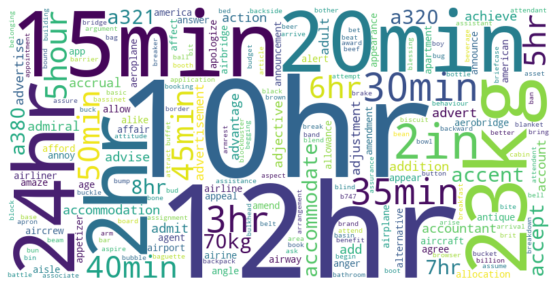

In [26]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all words from all columns into a single string
text = ' '.join(filtered_df.columns)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Word cloud for first 20 indexes

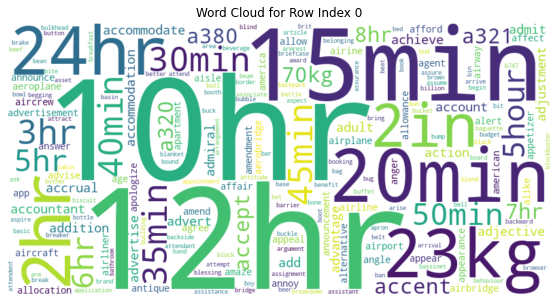

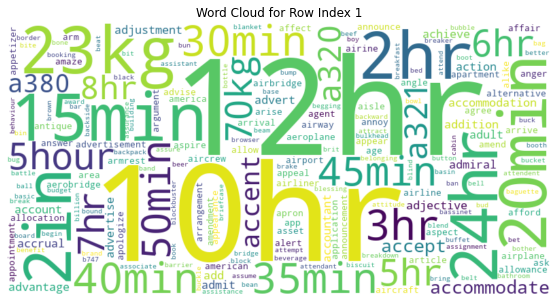

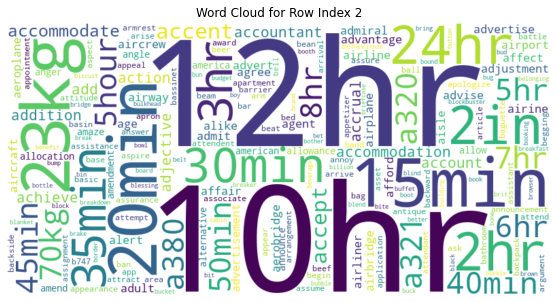

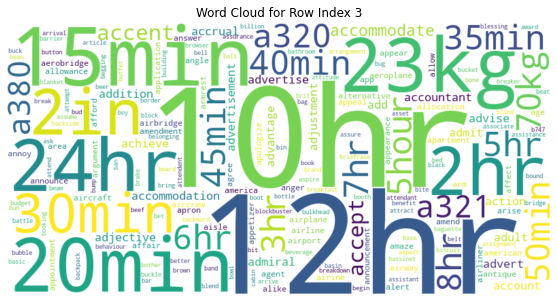

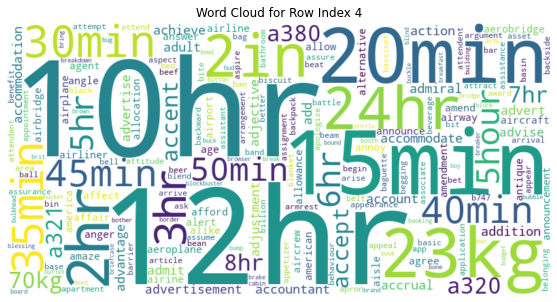

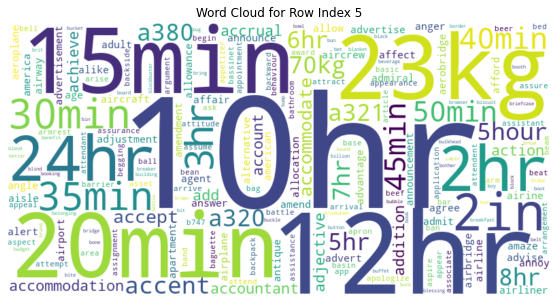

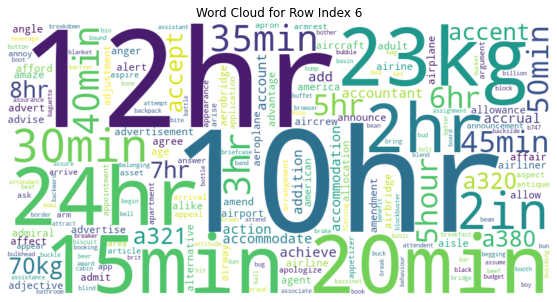

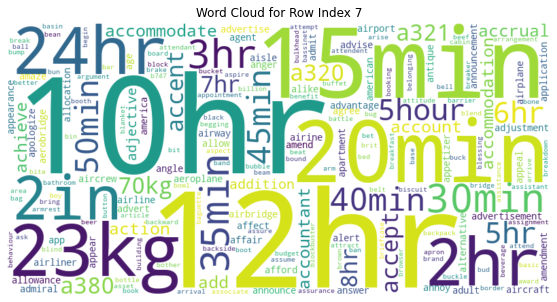

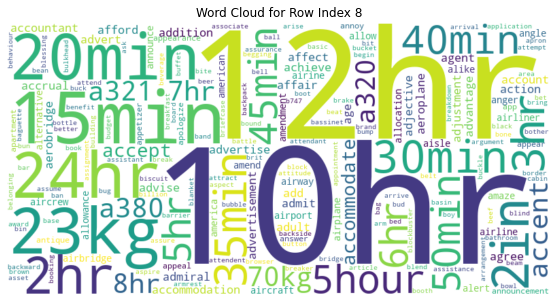

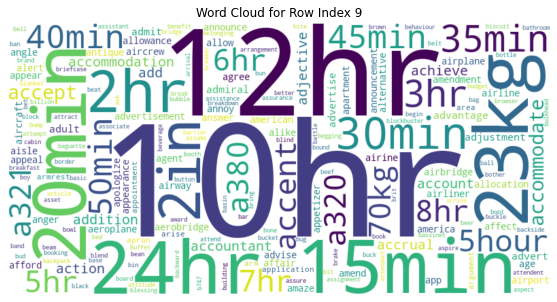

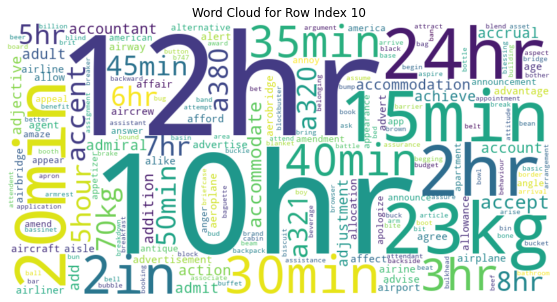

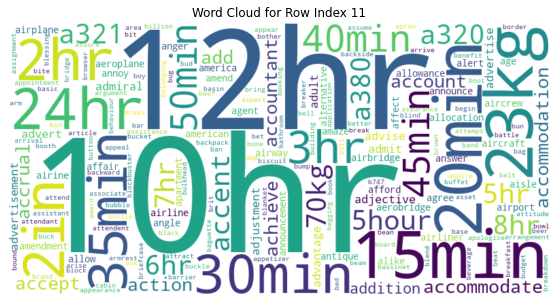

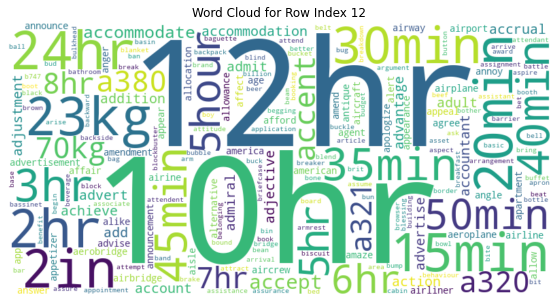

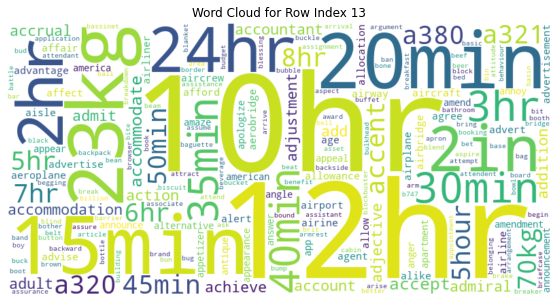

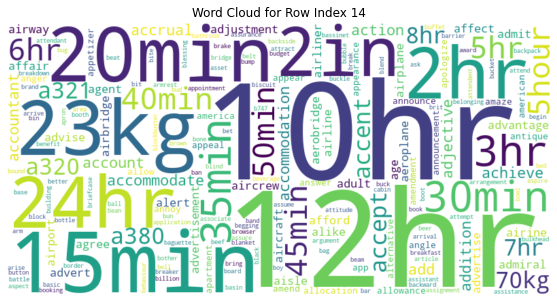

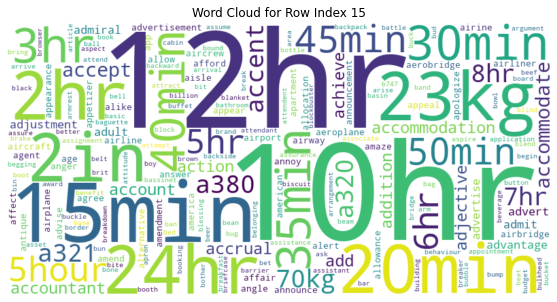

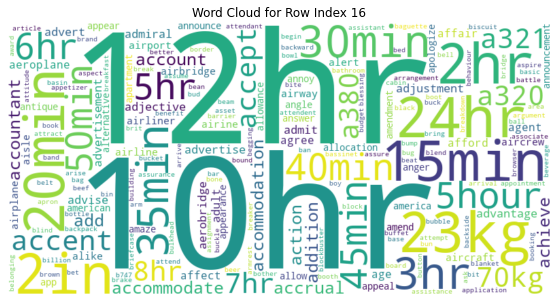

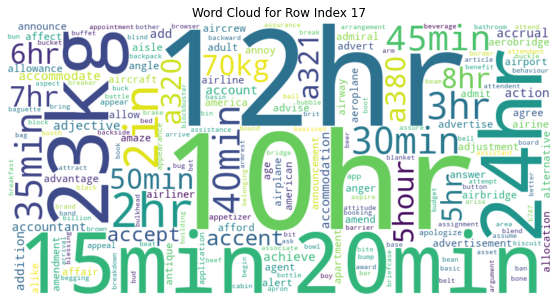

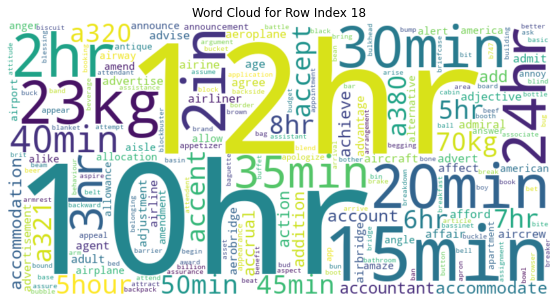

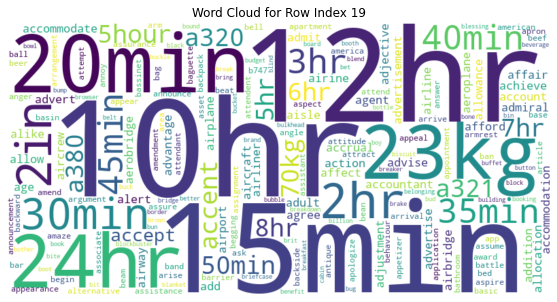

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#
indices_to_display = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]  

for index in indices_to_display:
    row = filtered_df.iloc[index]

    # Concatenate all words from the current row into a single string
    text = ' '.join(row.index.astype(str))

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the WordCloud image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Row Index {index}')
    plt.axis('off')
    plt.show()  # Display the image


In [30]:
top_30_words_per_row = pd.DataFrame(index=filtered_df.index, columns=range(30))


for row_index in filtered_df.index:
    # Sort the words based on frequency in the current row
    # dtm_df.loc[row_index].sort_values(ascending=False) 
    # select a row and sort each row based on the frequency of words
    sorted_word_frequencies = filtered_df.loc[row_index].sort_values(ascending=False)
    
    print(sorted_word_frequencies)
    

flight        3
departure     1
keeping       1
alcoholic     1
clean         1
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 0, Length: 14007, dtype: int64
crew           1
missed         1
praise         1
verified       1
short          1
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 1, Length: 14007, dtype: int64
flight        9
british       6
boarding      5
airways       5
connecting    5
             ..
downside      0
downsides     0
downsize      0
downtime      0
über          0
Name: 2, Length: 14007, dtype: int64
hours         4
passengers    3
told          3
crew          2
way           2
             ..
doyle         0
dozed         0
dozen         0
dozens        0
über          0
Name: 3, Length: 14007, dtype: int64
plane         2
service       2
staff         2
left          2
attached      1
             ..
downloaded    0
downmarket    0
downright

flights       6
really        3
arrived       3
airport       2
200           2
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 64, Length: 14007, dtype: int64
flight         3
business       3
class          2
utterly        2
check          2
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 65, Length: 14007, dtype: int64
class         3
business      2
managed       1
worth         1
poorly        1
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 66, Length: 14007, dtype: int64
flight        2
seats         2
luggage       2
european      2
flights       2
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 67, Length: 14007, dtype: int64
available    3
minutes      3
champagne    3
far          2
fa           2
            ..
downright    0
downs        0
downside     

terminal       4
time           2
make           2
flight         2
ray            1
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 126, Length: 14007, dtype: int64
wheelchair    4
flight        3
seat          3
took          3
assistance    2
             ..
downtime      0
downtown      0
downward      0
downwards     0
über          0
Name: 127, Length: 14007, dtype: int64
fine          2
ok            2
hours         2
check         1
pre           1
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 128, Length: 14007, dtype: int64
hour           2
did            2
boarding       2
apologise      1
passengers     1
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 129, Length: 14007, dtype: int64
flight        2
reviews       2
miss          1
having        1
given         1
             ..
downhill      0
downlo

airline         3
don             1
cancellation    1
arrangement     1
happened        1
               ..
downgrading     0
downhill        0
download        0
downloaded      0
über            0
Name: 184, Length: 14007, dtype: int64
flight       6
did          3
flights      3
evening      3
booking      3
            ..
downs        0
downside     0
downsides    0
downsize     0
über         0
Name: 185, Length: 14007, dtype: int64
british      8
airways      8
flight       5
received     4
expedia      4
            ..
downwards    0
doyle        0
dozed        0
dozen        0
über         0
Name: 186, Length: 14007, dtype: int64
board         3
old           2
passengers    2
club          2
check         1
             ..
downmarket    0
downright     0
downs         0
downside      0
über          0
Name: 187, Length: 14007, dtype: int64
cancelled      2
flight         2
2023           1
verified       1
day            1
              ..
downgrading    0
downhill       0
down

recline       3
tight         2
flight        2
staff         2
seats         2
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 243, Length: 14007, dtype: int64
pleasant       1
niggle         1
heathrow       1
bussed         1
competitors    1
              ..
downgrade      0
downgraded     0
downgrades     0
downgrading    0
über           0
Name: 244, Length: 14007, dtype: int64
luggage        3
flight         2
north          2
glasgow        2
connecting     2
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 245, Length: 14007, dtype: int64
flight          9
multiple        3
2023            3
refund          3
cancellation    3
               ..
dragged         0
dragging        0
drained         0
draining        0
über            0
Name: 246, Length: 14007, dtype: int64
budget        5
pay           3
ticket        3
price         3
fly           3
             ..


premium        3
economy        3
excellent      2
pleasant       2
connection     2
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 302, Length: 14007, dtype: int64
seats         3
flight        2
employee      2
day           2
help          2
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 303, Length: 14007, dtype: int64
counter        2
improvement    1
copenhagen     1
airlines       1
fixed          1
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 304, Length: 14007, dtype: int64
trying        3
service       2
customer      2
equivalent    2
say           2
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 305, Length: 14007, dtype: int64
crew             3
entertainment    2
airline          2
paid             2
injury           1
                ..
down

flight        4
madrid        4
went          4
number        4
lady          4
             ..
downside      0
downsides     0
downsize      0
downstairs    0
über          0
Name: 365, Length: 14007, dtype: int64
crew          3
best          1
trip          1
really        1
experience    1
             ..
downfall      0
downgrade     0
downgraded    0
downgrades    0
über          0
Name: 366, Length: 14007, dtype: int64
crew         5
world        4
asked        3
companion    3
11f          2
            ..
downwards    0
doyle        0
dozed        0
dozen        0
über         0
Name: 367, Length: 14007, dtype: int64
poor           3
economy        2
flight         2
limited        2
class          1
              ..
downgrade      0
downgraded     0
downgrades     0
downgrading    0
über           0
Name: 368, Length: 14007, dtype: int64
flight        2
hitting       1
70            1
midnight      1
took          1
             ..
downloaded    0
downmarket    0
downright   

provided       2
good           2
service        2
meals          2
person         1
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 423, Length: 14007, dtype: int64
good          2
breakfast     1
trip          1
flight        1
business      1
             ..
downfall      0
downgrade     0
downgraded    0
downgrades    0
über          0
Name: 424, Length: 14007, dtype: int64
just          4
flight        3
hours         3
board         3
crew          3
             ..
downsides     0
downsize      0
downstairs    0
downtime      0
über          0
Name: 425, Length: 14007, dtype: int64
seats          3
experience     2
new            2
verified       1
fly            1
              ..
downgrade      0
downgraded     0
downgrades     0
downgrading    0
über           0
Name: 426, Length: 14007, dtype: int64
delivered     2
crew          2
people        1
colleagues    1
trip          1
             ..
downmarket    0
downri

flight         2
cancelled      2
spent          1
verified       1
money          1
              ..
downgrade      0
downgraded     0
downgrades     0
downgrading    0
über           0
Name: 483, Length: 14007, dtype: int64
24            2
time          2
hours         2
contact       1
tickets       1
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 484, Length: 14007, dtype: int64
vouchers       3
refund         2
told           1
option         1
options        1
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 485, Length: 14007, dtype: int64
flight       5
did          3
cdg          3
took         2
mia          2
            ..
downright    0
downs        0
downside     0
downsides    0
über         0
Name: 486, Length: 14007, dtype: int64
flight         2
connection     1
british        1
lost           1
travel         1
              ..
downgrades     0
downgradin

trip          4
haul          3
allowed       3
seat          3
flights       3
             ..
downsize      0
downstairs    0
downtime      0
downtown      0
über          0
Name: 541, Length: 14007, dtype: int64
great         3
new           2
seat          1
trip          1
flight        1
             ..
downfall      0
downgrade     0
downgraded    0
downgrades    0
über          0
Name: 542, Length: 14007, dtype: int64
online        3
check         3
time          2
says          2
airways       2
             ..
downmarket    0
downright     0
downs         0
downside      0
über          0
Name: 543, Length: 14007, dtype: int64
trip         4
time         2
online       2
airline      2
booked       2
            ..
downright    0
downs        0
downside     0
downsides    0
über         0
Name: 544, Length: 14007, dtype: int64
experience    3
thought       2
getting       1
flawless      1
majority      1
             ..
downmarket    0
downright     0
downs         0
downsid

extra        4
business     3
class        3
come         2
british      2
            ..
downright    0
downs        0
downside     0
downsides    0
über         0
Name: 593, Length: 14007, dtype: int64
staff         5
processing    3
airline       2
plane         2
member        2
             ..
downright     0
downs         0
downside      0
downsides     0
über          0
Name: 594, Length: 14007, dtype: int64
releases       2
new            2
minimal        1
trip           1
didn           1
              ..
downgrade      0
downgraded     0
downgrades     0
downgrading    0
über           0
Name: 595, Length: 14007, dtype: int64
lounge       5
asked        3
basic        3
actually     2
used         2
            ..
downward     0
downwards    0
doyle        0
dozed        0
über         0
Name: 596, Length: 14007, dtype: int64
check        5
airport      3
warsaw       3
drop         2
flight       2
            ..
downs        0
downside     0
downsides    0
downsize     0
ü

service      4
delayed      2
crew         2
lack         1
plenty       1
            ..
downs        0
downside     0
downsides    0
downsize     0
über         0
Name: 644, Length: 14007, dtype: int64
impressed      1
notch          1
verified       1
customer       1
service        1
              ..
downgraded     0
downgrades     0
downgrading    0
downhill       0
über           0
Name: 645, Length: 14007, dtype: int64
people        3
uk            3
crew          2
cabin         2
incorrect     1
             ..
downmarket    0
downright     0
downs         0
downside      0
über          0
Name: 646, Length: 14007, dtype: int64
flight       3
flights      2
time         2
moment       2
gatwick      2
            ..
downright    0
downs        0
downside     0
downsides    0
über         0
Name: 647, Length: 14007, dtype: int64
got          5
diverted     4
crew         4
service      3
said         3
            ..
downs        0
downside     0
downsides    0
downsize     0
ü

flight       4
time         3
masks        3
social       2
allow        2
            ..
downs        0
downside     0
downsides    0
downsize     0
über         0
Name: 700, Length: 14007, dtype: int64
pleasantly     1
newcastle      1
staff          1
airways        1
verified       1
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 701, Length: 14007, dtype: int64
voucher       6
got           3
london        3
redeem        3
flight        3
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 702, Length: 14007, dtype: int64
money          3
service        2
airways        2
british        2
resolution     1
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 703, Length: 14007, dtype: int64
date          3
voucher       3
booked        3
service       3
days          2
             ..
downsides     0
downsize      0
d

madrid        2
cabin         2
money         2
meal          2
staff         2
             ..
downmarket    0
downright     0
downs         0
downside      0
über          0
Name: 756, Length: 14007, dtype: int64
early          2
check          2
heathrow       2
pay            2
checkin        1
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 757, Length: 14007, dtype: int64
reliability    1
different      1
plenty         1
civilised      1
solitary       1
              ..
downtime       0
downtown       0
downward       0
downwards      0
über           0
Name: 758, Length: 14007, dtype: int64
glass        6
offered      4
breakfast    4
water        4
wine         3
            ..
downward     0
downwards    0
doyle        0
dozed        0
über         0
Name: 759, Length: 14007, dtype: int64
flight         4
booking        4
club           3
goes           3
replacement    3
              ..
drabs          0
drag      

flight         3
boarding       2
hand           2
gate           2
luggage        2
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 819, Length: 14007, dtype: int64
service        2
time           2
flight         2
gates          2
depart         1
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 820, Length: 14007, dtype: int64
london        3
delayed       3
flight        3
bangalore     3
gate          2
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 821, Length: 14007, dtype: int64
flight         3
november       2
thank          2
like           2
sydney         2
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 822, Length: 14007, dtype: int64
check         3
bag           2
overhead      2
ensure        2
seat          1
             ..
download   

austin       2
flight       2
literally    2
staff        2
way          2
            ..
downs        0
downside     0
downsides    0
downsize     0
über         0
Name: 885, Length: 14007, dtype: int64
time           3
lockers        2
flight         2
austin         2
deck           2
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 886, Length: 14007, dtype: int64
flight       3
fly          2
28           2
refund       2
service      2
            ..
downright    0
downs        0
downside     0
downsides    0
über         0
Name: 887, Length: 14007, dtype: int64
passengers    3
delayed       2
meant         2
minutes       2
departure     2
             ..
downsides     0
downsize      0
downstairs    0
downtime      0
über          0
Name: 888, Length: 14007, dtype: int64
pm            6
time          5
30            4
chicago       3
zurich        3
             ..
download      0
downloaded    0
downmarket    0
downrig

birthday       3
trip           2
london         2
comfortable    1
flew           1
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 946, Length: 14007, dtype: int64
quite          2
legroom        2
seat           2
flight         2
hong           1
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 947, Length: 14007, dtype: int64
minutes      4
staff        4
got          3
web          3
hours        3
            ..
downtime     0
downtown     0
downward     0
downwards    0
über         0
Name: 948, Length: 14007, dtype: int64
cabin        5
staff        4
service      3
class        2
customers    2
            ..
downright    0
downs        0
downside     0
downsides    0
über         0
Name: 949, Length: 14007, dtype: int64
economy       2
ok            2
flight        2
small         2
films         1
             ..
downhill      0
download      0
downloaded  

good           4
flight         4
experience     4
crew           3
job            2
              ..
downgraded     0
downgrades     0
downgrading    0
downhill       0
über           0
Name: 1009, Length: 14007, dtype: int64
actually      3
bread         2
according     2
new           2
staff         2
             ..
downstairs    0
downtime      0
downtown      0
downward      0
über          0
Name: 1010, Length: 14007, dtype: int64
flight        4
sofia         3
belfast       3
service       3
legroom       2
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 1011, Length: 14007, dtype: int64
flight           3
screen           3
poor             2
entertainment    2
movies           2
                ..
downgrade        0
downgraded       0
downgrades       0
downgrading      0
über             0
Name: 1012, Length: 14007, dtype: int64
hour           2
flight         1
leg            1
provide        1
room           1
       

flight       4
larnaca      3
food         3
heathrow     3
cabin        2
            ..
downtown     0
downward     0
downwards    0
doyle        0
über         0
Name: 1068, Length: 14007, dtype: int64
flight         4
seat           3
passengers     2
section        2
choice         2
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 1069, Length: 14007, dtype: int64
airlines      7
american      6
british       5
airways       5
went          4
             ..
downsize      0
downstairs    0
downtime      0
downtown      0
über          0
Name: 1070, Length: 14007, dtype: int64
wouldn         2
change         2
allow          1
cancel         1
avios          1
              ..
downgraded     0
downgrades     0
downgrading    0
downhill       0
über           0
Name: 1071, Length: 14007, dtype: int64
european       2
best           1
close          1
london         1
short          1
              ..
downgrades     0
downgr

seats         4
seat          3
economy       3
broken        2
people        2
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 1124, Length: 14007, dtype: int64
seat         4
available    3
seats        3
make         3
boac         3
            ..
downtown     0
downward     0
downwards    0
doyle        0
über         0
Name: 1125, Length: 14007, dtype: int64
member         2
seats          2
class          2
business       2
airlines       1
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 1126, Length: 14007, dtype: int64
served         5
cabin          3
premium        3
economy        3
staff          2
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 1127, Length: 14007, dtype: int64
selection      2
meal           2
served         1
crisps         1
sitting        1
              ..
downgrades     0
downgr

london        2
trip          2
accra         2
phoenix       2
staff         2
             ..
downfall      0
downgrade     0
downgraded    0
downgrades    0
über          0
Name: 1172, Length: 14007, dtype: int64
offered       2
attendant     2
apology       2
staff         2
flight        2
             ..
downloaded    0
downmarket    0
downright     0
downs         0
über          0
Name: 1173, Length: 14007, dtype: int64
refund        6
seat          5
booked        5
flight        4
american      4
             ..
downsize      0
downstairs    0
downtime      0
downtown      0
über          0
Name: 1174, Length: 14007, dtype: int64
stuttgart      2
hold           2
assistance     1
proven         1
sure           1
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 1175, Length: 14007, dtype: int64
cabin        5
good         2
room         2
crew         2
food         2
            ..
downright    0
downs        0
downs

flight        3
class         2
really        2
experience    2
767s          2
             ..
downmarket    0
downright     0
downs         0
downside      0
über          0
Name: 1227, Length: 14007, dtype: int64
food          3
club          2
pre           2
handled       2
europe        2
             ..
downloaded    0
downmarket    0
downright     0
downs         0
über          0
Name: 1228, Length: 14007, dtype: int64
seat         6
fast         2
choice       2
iberia       2
track        2
            ..
downright    0
downs        0
downside     0
downsides    0
über         0
Name: 1229, Length: 14007, dtype: int64
hamburg       2
departure     2
service       2
london        2
demanded      2
             ..
downmarket    0
downright     0
downs         0
downside      0
über          0
Name: 1230, Length: 14007, dtype: int64
looking        3
journey        2
poor           2
miami          2
good           2
              ..
downgrading    0
downhill       0
download   

class         5
plane         4
british       3
dirty         3
flight        3
             ..
downloaded    0
downmarket    0
downright     0
downs         0
über          0
Name: 1287, Length: 14007, dtype: int64
dublin        3
miami         2
heathrow      2
hours         2
given         2
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 1288, Length: 14007, dtype: int64
sports        2
equipment     2
bring         2
bike          2
south         1
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 1289, Length: 14007, dtype: int64
flight        2
bag           2
did           2
mins          2
staff         2
             ..
downloaded    0
downmarket    0
downright     0
downs         0
über          0
Name: 1290, Length: 14007, dtype: int64
seat          4
did           3
changed       2
business      2
cabin         2
             ..
downmarket    0
downright     0
downs   

flights      3
border       2
glasgow      2
london       2
heathrow     2
            ..
downright    0
downs        0
downside     0
downsides    0
über         0
Name: 1342, Length: 14007, dtype: int64
counter       4
ticket        4
flight        4
airport       4
did           3
             ..
downsides     0
downsize      0
downstairs    0
downtime      0
über          0
Name: 1343, Length: 14007, dtype: int64
flight        4
amsterdam     3
aircraft      3
delay         3
tokyo         3
             ..
downside      0
downsides     0
downsize      0
downstairs    0
über          0
Name: 1344, Length: 14007, dtype: int64
quite         4
europe        3
tea           2
wasn          2
club          2
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 1345, Length: 14007, dtype: int64
british       2
sleep         2
aircraft      2
airways       2
trip          2
             ..
downside      0
downsides     0
downsize      0
dow

ran            3
crew           3
food           2
flight         2
told           1
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 1399, Length: 14007, dtype: int64
options       4
food          3
good          3
beijing       3
service       3
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 1400, Length: 14007, dtype: int64
service        3
food           3
breakfast      2
ok             2
available      2
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 1401, Length: 14007, dtype: int64
meals          2
dated          2
long           2
worst          2
served         2
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 1402, Length: 14007, dtype: int64
flight        3
moscow        2
passengers    2
flights       2
stand         2
             ..
downloa

flight        5
service       5
easyjet       3
outbound      2
expect        2
             ..
downloaded    0
downmarket    0
downright     0
downs         0
über          0
Name: 1457, Length: 14007, dtype: int64
flight        9
new           6
york          4
london        3
requested     3
             ..
downsize      0
downstairs    0
downtime      0
downtown      0
über          0
Name: 1458, Length: 14007, dtype: int64
british        2
airlines       2
good           2
models         1
middle         1
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 1459, Length: 14007, dtype: int64
london        4
city          3
flight        3
problem       3
technical     2
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 1460, Length: 14007, dtype: int64
flight         4
rescheduled    3
11am           3
night          2
phone          2
              ..
downside       0
downsi

know         2
airport      2
bologna      2
plane        2
arrived      2
            ..
downs        0
downside     0
downsides    0
downsize     0
über         0
Name: 1519, Length: 14007, dtype: int64
flight     10
seats       6
rome        5
british     4
airways     4
           ..
doyle       0
dozed       0
dozen       0
dozens      0
über        0
Name: 1520, Length: 14007, dtype: int64
good           3
courses        2
flight         2
seats          2
look           1
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 1521, Length: 14007, dtype: int64
staff         5
plane         3
help          3
member        3
hand          2
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 1522, Length: 14007, dtype: int64
british       3
airways       3
ignored       2
review        2
service       2
             ..
downfall      0
downgrade     0
downgraded    0
downgrades    

bag          2
service      2
talking      2
board        2
shocked      2
            ..
downward     0
downwards    0
doyle        0
dozed        0
über         0
Name: 1580, Length: 14007, dtype: int64
food          3
facing        3
best          3
flying        2
cabin         2
             ..
downmarket    0
downright     0
downs         0
downside      0
über          0
Name: 1581, Length: 14007, dtype: int64
airline      4
service      4
fact         4
overall      3
catering     3
            ..
downwards    0
doyle        0
dozed        0
dozen        0
über         0
Name: 1582, Length: 14007, dtype: int64
service      11
early         5
flight        5
crew          5
departure     4
             ..
dozed         0
dozen         0
dozens        0
dpd           0
über          0
Name: 1583, Length: 14007, dtype: int64
flight         2
route          1
available      1
crew           1
putting        1
              ..
downgrading    0
downhill       0
download       0
downl

downgraded    3
say           3
athens        3
flight        3
later         3
             ..
downstairs    0
downtime      0
downtown      0
downward      0
über          0
Name: 1636, Length: 14007, dtype: int64
ok            4
flight        2
business      2
premium       2
booked        1
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 1637, Length: 14007, dtype: int64
flight         9
airline        5
passengers     5
club           3
new            3
              ..
drains         0
drakensberg    0
drama          0
dramatic       0
über           0
Name: 1638, Length: 14007, dtype: int64
flight      9
handling    6
terminal    5
agents      5
cabin       4
           ..
dozens      0
dpd         0
drab        0
drabs       0
über        0
Name: 1639, Length: 14007, dtype: int64
business      2
aircraft      2
crew          2
time          1
outdated      1
             ..
downside      0
downsides     0
downsize      0
dow

better        1
review        1
low           1
verified      1
option        1
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 1698, Length: 14007, dtype: int64
staff          2
cabin          2
service        2
boarding       2
lukewarm       1
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 1699, Length: 14007, dtype: int64
board         2
stockholm     2
service       2
buy           2
cost          1
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 1700, Length: 14007, dtype: int64
bag           3
luggage       2
crew          2
cabin         2
took          2
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 1701, Length: 14007, dtype: int64
product       4
month         2
accra         2
cargo         2
business      2
             ..
downloaded    0
downmarket   

class         6
service       4
british       3
airways       3
business      3
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 1759, Length: 14007, dtype: int64
flight         3
british        2
gatwick        2
airways        2
leg            1
              ..
downgraded     0
downgrades     0
downgrading    0
downhill       0
über           0
Name: 1760, Length: 14007, dtype: int64
cost         6
cutting      5
class        5
service      4
cabin        4
            ..
downtime     0
downtown     0
downward     0
downwards    0
über         0
Name: 1761, Length: 14007, dtype: int64
meal          2
clearly       2
roll          2
selection     2
crew          2
             ..
downloaded    0
downmarket    0
downright     0
downs         0
über          0
Name: 1762, Length: 14007, dtype: int64
check         2
heathrow      2
checked       2
allowance     2
confirmed     2
             ..
downhill      0
download      0
download

food         3
seats        3
like         3
said         3
flight       3
            ..
downtown     0
downward     0
downwards    0
doyle        0
über         0
Name: 1827, Length: 14007, dtype: int64
served       5
flight       4
water        3
airways      3
british      3
            ..
downwards    0
doyle        0
dozed        0
dozen        0
über         0
Name: 1828, Length: 14007, dtype: int64
staff          4
seats          3
friendly       3
flight         3
attentive      3
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 1829, Length: 14007, dtype: int64
business      5
good          4
toilet        4
class         4
seats         4
             ..
downsides     0
downsize      0
downstairs    0
downtime      0
über          0
Name: 1830, Length: 14007, dtype: int64
seats        4
journey      3
hot          2
got          2
star         2
            ..
downs        0
downside     0
downsides    0
downsize    

offering       4
economy        3
flight         2
seat           2
crew           2
              ..
downgrading    0
download       0
downloaded     0
downmarket     0
über           0
Name: 1887, Length: 14007, dtype: int64
quite        3
heathrow     2
dirty        2
cheap        2
cutting      2
            ..
downtown     0
downward     0
downwards    0
doyle        0
über         0
Name: 1888, Length: 14007, dtype: int64
chicken       2
didn          2
flight        2
care          2
return        2
             ..
downgrade     0
downgraded    0
downgrades    0
downhill      0
über          0
Name: 1889, Length: 14007, dtype: int64
asked         5
flights       4
year          3
british       3
airways       3
             ..
downsize      0
downstairs    0
downtime      0
downtown      0
über          0
Name: 1890, Length: 14007, dtype: int64
fast        5
class       5
decent      5
leg         5
good        4
           ..
dragged     0
dragging    0
drained     0
draining  

clean         1
flight        1
definitely    1
great         1
room          1
             ..
downfall      0
downgrade     0
downgraded    0
downgrades    0
über          0
Name: 1946, Length: 14007, dtype: int64
drinks       4
options      3
took         2
extremely    2
race         2
            ..
dpd          0
drab         0
drabs        0
drag         0
über         0
Name: 1947, Length: 14007, dtype: int64
flight       11
seat          6
told          5
available     4
staff         4
             ..
dragging      0
drained       0
draining      0
drains        0
über          0
Name: 1948, Length: 14007, dtype: int64
accra         2
service       2
overnight     2
snack         1
lights        1
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 1949, Length: 14007, dtype: int64
passengers    3
class         3
business      3
lounge        2
actually      2
             ..
downmarket    0
downright     0
downs         0
dow

flight         2
size           1
management     1
crew           1
review         1
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 2006, Length: 14007, dtype: int64
flight          9
business        6
reply           4
online          4
compensation    4
               ..
downward        0
downwards       0
doyle           0
dozed           0
über            0
Name: 2007, Length: 14007, dtype: int64
bad           3
london        3
seats         3
business      2
allowed       2
             ..
downsides     0
downsize      0
downstairs    0
downtime      0
über          0
Name: 2008, Length: 14007, dtype: int64
flight        3
allowed       2
pretty        2
bags          2
carry         1
             ..
downsides     0
downsize      0
downstairs    0
downtime      0
über          0
Name: 2009, Length: 14007, dtype: int64
airline       2
flight        2
coming        1
verified      1
happened      1
             ..
downhil

meal         3
mediocre     2
seat         2
food         2
lounge       2
            ..
downright    0
downs        0
downside     0
downsides    0
über         0
Name: 2069, Length: 14007, dtype: int64
seat         4
flight       3
coach        2
flat         2
barely       2
            ..
downright    0
downs        0
downside     0
downsides    0
über         0
Name: 2070, Length: 14007, dtype: int64
chosen         2
class          2
seat           2
a380           2
business       2
              ..
downgrade      0
downgraded     0
downgrades     0
downgrading    0
über           0
Name: 2071, Length: 14007, dtype: int64
flight      8
heathrow    7
terminal    7
refused     6
help        6
           ..
doyle       0
dozed       0
dozen       0
dozens      0
über        0
Name: 2072, Length: 14007, dtype: int64
service       4
regular       3
remains       3
years         3
recent        2
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über     

a380         4
row          3
return       3
aircraft     2
stop         2
            ..
downs        0
downside     0
downsides    0
downsize     0
über         0
Name: 2132, Length: 14007, dtype: int64
flight         4
nice           2
london         2
airways        2
lisbon         2
              ..
downgrade      0
downgraded     0
downgrades     0
downgrading    0
über           0
Name: 2133, Length: 14007, dtype: int64
flight        4
think         3
seat          3
good          3
quite         2
             ..
downstairs    0
downtime      0
downtown      0
downward      0
über          0
Name: 2134, Length: 14007, dtype: int64
777          3
flight       3
787          3
new          2
crew         2
            ..
downwards    0
doyle        0
dozed        0
dozen        0
über         0
Name: 2135, Length: 14007, dtype: int64
business     3
crew         3
cabin        3
lollipop     1
tannoy       1
            ..
downtown     0
downward     0
downwards    0
doyle       

catering     2
hour         2
flight       2
crew         2
check        1
            ..
downright    0
downs        0
downside     0
downsides    0
über         0
Name: 2189, Length: 14007, dtype: int64
children     3
travel       3
economy      2
emirates     2
food         2
            ..
downright    0
downs        0
downside     0
downsides    0
über         0
Name: 2190, Length: 14007, dtype: int64
flight        6
luggage       3
service       3
time          2
passangers    2
             ..
dozed         0
dozen         0
dozens        0
dpd           0
über          0
Name: 2191, Length: 14007, dtype: int64
class       8
hours       4
ticket      4
business    4
bag         4
           ..
dozen       0
dozens      0
dpd         0
drab        0
über        0
Name: 2192, Length: 14007, dtype: int64
management    2
food          2
clearly       2
staff         2
cabin         2
             ..
downmarket    0
downright     0
downs         0
downside      0
über          0
Name

flight      5
atlanta     3
agent       3
flying      3
heathrow    3
           ..
dozed       0
dozen       0
dozens      0
dpd         0
über        0
Name: 2249, Length: 14007, dtype: int64
time          2
departure     2
good          2
coffee        2
cutbacks      1
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 2250, Length: 14007, dtype: int64
good         2
quick        2
seat         2
dubrovnik    2
flight       2
            ..
downs        0
downside     0
downsides    0
downsize     0
über         0
Name: 2251, Length: 14007, dtype: int64
seat           7
deck           4
flight         4
gate           2
reservation    2
              ..
downstairs     0
downtime       0
downtown       0
downward       0
über           0
Name: 2252, Length: 14007, dtype: int64
minutes       2
seat          2
little        2
boarding      2
class         1
             ..
downmarket    0
downright     0
downs         0
downside      

flight        4
service       2
customer      2
desk          1
late          1
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 2312, Length: 14007, dtype: int64
flight        9
heathrow      5
san           2
aberdeen      2
hour          2
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 2313, Length: 14007, dtype: int64
class          4
food           2
cabin          2
number         2
crew           2
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 2314, Length: 14007, dtype: int64
seat             4
new              3
service          3
aircraft         2
entertainment    2
                ..
downhill         0
download         0
downloaded       0
downmarket       0
über             0
Name: 2315, Length: 14007, dtype: int64
seat           3
club           2
new            2
world          2
62k            2
       

lounge        4
available     3
heathrow      3
food          3
really        3
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 2369, Length: 14007, dtype: int64
service        3
fine           2
crew           2
good           2
concorde       1
              ..
downgraded     0
downgrades     0
downgrading    0
downhill       0
über           0
Name: 2370, Length: 14007, dtype: int64
flight         4
luggage        3
bucharest      2
hour           2
cabin          2
              ..
downgraded     0
downgrades     0
downgrading    0
downhill       0
über           0
Name: 2371, Length: 14007, dtype: int64
delays         2
new            2
pacific        1
attempt        1
computer       1
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 2372, Length: 14007, dtype: int64
flight        4
check         3
manager       3
stand         3
booked        2
             ..
downsid

club         5
lounge       4
flight       4
world        3
service      3
            ..
downtown     0
downward     0
downwards    0
doyle        0
über         0
Name: 2423, Length: 14007, dtype: int64
flight         2
fly            2
provided       1
subzero        1
bother         1
              ..
downgrading    0
download       0
downloaded     0
downmarket     0
über           0
Name: 2424, Length: 14007, dtype: int64
return        3
service       3
airways       2
british       2
journey       2
             ..
downfall      0
downgrade     0
downgraded    0
downgrades    0
über          0
Name: 2425, Length: 14007, dtype: int64
class          4
business       3
product        2
check          2
joke           2
              ..
downgraded     0
downgrades     0
downgrading    0
downhill       0
über           0
Name: 2426, Length: 14007, dtype: int64
pretty        3
late          3
lounge        3
lgw           3
seat          3
             ..
downsize      0
downstairs   

flight         4
london         3
let            2
seoul          2
impressed      2
              ..
downgrade      0
downgraded     0
downgrades     0
downgrading    0
über           0
Name: 2477, Length: 14007, dtype: int64
room           3
leg            3
row            2
strength       2
economy        2
              ..
downgrade      0
downgraded     0
downgrades     0
downgrading    0
über           0
Name: 2478, Length: 14007, dtype: int64
vegetarian     1
long           1
houston        1
adequate       1
free           1
              ..
downgraded     0
downgrades     0
downgrading    0
downhill       0
über           0
Name: 2479, Length: 14007, dtype: int64
help          3
home          2
class         2
business      2
airport       2
             ..
downloaded    0
downmarket    0
downright     0
downs         0
über          0
Name: 2480, Length: 14007, dtype: int64
seat         9
leg          4
nice         3
52a          3
747          3
            ..
downward     

screens        2
ones           1
767            1
given          1
lover          1
              ..
downgrade      0
downgraded     0
downgrades     0
downgrading    0
über           0
Name: 2535, Length: 14007, dtype: int64
did           6
flight        6
just          3
attendant     3
food          3
             ..
downstairs    0
downtime      0
downtown      0
downward      0
über          0
Name: 2536, Length: 14007, dtype: int64
seats            3
long             3
seat             2
inflight         2
entertainment    2
                ..
downsides        0
downsize         0
downstairs       0
downtime         0
über             0
Name: 2537, Length: 14007, dtype: int64
lounge           5
crew             4
lounges          3
friendly         3
disappointing    3
                ..
dozens           0
dpd              0
drab             0
drabs            0
über             0
Name: 2538, Length: 14007, dtype: int64
flight         5
nice           3
short          2
british 

service       3
staff         2
food          2
couldn        2
sleep         2
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 2593, Length: 14007, dtype: int64
economy        3
british        2
airways        2
premium        2
looked         1
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 2594, Length: 14007, dtype: int64
london         3
return         3
bucharest      2
heathrow       2
good           2
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 2595, Length: 14007, dtype: int64
class      3
airways    3
british    3
service    3
bacon      2
          ..
dozed      0
dozen      0
dozens     0
dpd        0
über       0
Name: 2596, Length: 14007, dtype: int64
flights       3
voucher       1
equivalent    1
using         1
better        1
             ..
downhill      0
download      0
downloaded    0
dow

flight        3
crew          3
champagne     3
club          3
wine          3
             ..
downstairs    0
downtime      0
downtown      0
downward      0
über          0
Name: 2654, Length: 14007, dtype: int64
ok            2
seat          2
red           1
sadly         1
boeing        1
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 2655, Length: 14007, dtype: int64
best          2
superb        1
exit          1
legroom       1
past          1
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 2656, Length: 14007, dtype: int64
leg            2
room           2
flight         2
airlines       2
british        2
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 2657, Length: 14007, dtype: int64
food          2
buy           2
passengers    1
wine          1
bad           1
             ..
downloaded    0
downmarket   

good           2
london         1
armrest        1
airways        1
thing          1
              ..
downgraded     0
downgrades     0
downgrading    0
downhill       0
über           0
Name: 2715, Length: 14007, dtype: int64
good          5
class         3
airways       3
british       3
just          2
             ..
downloaded    0
downmarket    0
downright     0
downs         0
über          0
Name: 2716, Length: 14007, dtype: int64
airline        2
asked          2
pepper         2
point          2
service        2
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 2717, Length: 14007, dtype: int64
food           2
world          1
business       1
seats          1
quality        1
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 2718, Length: 14007, dtype: int64
good           3
way            2
seat           2
average        2
cabin          2
              ..
d

economy       4
difference    2
premium       2
having        2
tv            1
             ..
downer        0
downfall      0
downgrade     0
downgraded    0
über          0
Name: 2774, Length: 14007, dtype: int64
flight         3
section        2
did            2
british        2
wife           2
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 2775, Length: 14007, dtype: int64
connection    3
departure     3
security      2
cabin         2
t4s           2
             ..
downsize      0
downstairs    0
downtime      0
downtown      0
über          0
Name: 2776, Length: 14007, dtype: int64
passengers    2
cost          2
british       2
just          2
airways       2
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 2777, Length: 14007, dtype: int64
row          2
ran          2
flight       2
steward      1
vegas        1
            ..
downs        0
downside     0
downs

service          3
heathrow         2
complimentary    2
barcelona        2
london           2
                ..
downgrades       0
downgrading      0
downhill         0
download         0
über             0
Name: 2830, Length: 14007, dtype: int64
time          3
number        2
tried         2
online        2
son           2
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 2831, Length: 14007, dtype: int64
seat          6
flight        3
just          3
better        2
leg           2
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 2832, Length: 14007, dtype: int64
food          4
service       2
asked         2
offered       2
airways       2
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 2833, Length: 14007, dtype: int64
seats          3
club           2
europe         2
way            2
just           1
              ..
d

aircraft     2
flight       2
budget       2
crew         1
airways      1
            ..
downright    0
downs        0
downside     0
downsides    0
über         0
Name: 2876, Length: 14007, dtype: int64
lounge       4
flight       3
class        2
good         2
okay         2
            ..
downs        0
downside     0
downsides    0
downsize     0
über         0
Name: 2877, Length: 14007, dtype: int64
airways       3
british       3
cabin         2
flight        2
kept          2
             ..
downside      0
downsides     0
downsize      0
downstairs    0
über          0
Name: 2878, Length: 14007, dtype: int64
flight           3
seats            2
old              2
working          1
international    1
                ..
download         0
downloaded       0
downmarket       0
downright        0
über             0
Name: 2879, Length: 14007, dtype: int64
london        4
service       4
new           4
york          3
aircraft      3
             ..
downmarket    0
downright    

forget        2
best          2
qantas        2
crew          2
rear          1
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 2939, Length: 14007, dtype: int64
flight        5
class         5
lounge        3
passenger     2
airline       2
             ..
downmarket    0
downright     0
downs         0
downside      0
über          0
Name: 2940, Length: 14007, dtype: int64
good          3
staff         3
domestic      2
service       2
provided      2
             ..
downmarket    0
downright     0
downs         0
downside      0
über          0
Name: 2941, Length: 14007, dtype: int64
ce            3
seats         3
priority      2
excellent     2
better        2
             ..
downsides     0
downsize      0
downstairs    0
downtime      0
über          0
Name: 2942, Length: 14007, dtype: int64
flight       5
check        3
gatwick      2
small        2
journey      2
            ..
downright    0
downs        0
downside     0
d

seats           3
particularly    2
free            2
paid            2
comfortable     2
               ..
downgrading     0
downhill        0
download        0
downloaded      0
über            0
Name: 2999, Length: 14007, dtype: int64
check        3
crew         3
cabin        3
excellent    2
lounge       2
            ..
downs        0
downside     0
downsides    0
downsize     0
über         0
Name: 3000, Length: 14007, dtype: int64
time         3
delay        3
drop         2
minutes      2
staff        2
            ..
downright    0
downs        0
downside     0
downsides    0
über         0
Name: 3001, Length: 14007, dtype: int64
good         4
check        3
fast         3
return       3
lounge       2
            ..
downright    0
downs        0
downside     0
downsides    0
über         0
Name: 3002, Length: 14007, dtype: int64
overall        2
good           2
lighting       1
recently       1
map            1
              ..
downgraded     0
downgrades     0
downgrading

seat          3
flight        3
crew          2
pretty        2
baggage       2
             ..
downside      0
downsides     0
downsize      0
downstairs    0
über          0
Name: 3055, Length: 14007, dtype: int64
new            2
seating        2
cabin          1
fine           1
gla            1
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 3056, Length: 14007, dtype: int64
time           2
runway         1
tray           1
leg            1
plane          1
              ..
downgrade      0
downgraded     0
downgrades     0
downgrading    0
über           0
Name: 3057, Length: 14007, dtype: int64
class        6
club         4
world        4
champagne    4
check        3
            ..
downs        0
downside     0
downsides    0
downsize     0
über         0
Name: 3058, Length: 14007, dtype: int64
good           2
nice           1
airbus         1
room           1
flew           1
              ..
downgrades     0
downgr

kwi           6
flight        3
flights       3
excellent     3
edi           3
             ..
downside      0
downsides     0
downsize      0
downstairs    0
über          0
Name: 3118, Length: 14007, dtype: int64
nice           3
seat           2
got            2
course         1
cw             1
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 3119, Length: 14007, dtype: int64
club           3
horror         3
flight         3
really         3
lounge         2
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 3120, Length: 14007, dtype: int64
aspect        2
return        2
staff         1
crew          1
flew          1
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 3121, Length: 14007, dtype: int64
good          3
excellent     3
staff         3
smiling       2
standard      2
             ..
downloaded    0
do

seat          2
waste         1
april         1
middle        1
money         1
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 3167, Length: 14007, dtype: int64
staff         3
served        2
15            2
extra         2
leg           2
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 3168, Length: 14007, dtype: int64
service      3
class        3
food         3
limited      2
lounge       2
            ..
downright    0
downs        0
downside     0
downsides    0
über         0
Name: 3169, Length: 14007, dtype: int64
seat         11
seats         3
class         3
business      3
flight        3
             ..
downsides     0
downsize      0
downtime      0
downtown      0
über          0
Name: 3170, Length: 14007, dtype: int64
seat          3
money         2
waste         2
coach         2
middle        2
             ..
downmarket    0
downright     0
downs         0
dow

wife           3
nice           3
like           3
pisa           2
club           2
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 3229, Length: 14007, dtype: int64
rice           2
couldn         2
room           2
leg            2
food           2
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 3230, Length: 14007, dtype: int64
flights       5
return        3
flight        3
manchester    3
airlines      2
             ..
downmarket    0
downright     0
downs         0
downside      0
über          0
Name: 3231, Length: 14007, dtype: int64
asked         3
return        3
bacardi       3
service       3
flight        3
             ..
downsides     0
downsize      0
downstairs    0
downtime      0
über          0
Name: 3232, Length: 14007, dtype: int64
better         2
jammed         1
holiday        1
seat           1
club           1
              ..
downgraded  

seats         3
business      2
food          2
den           2
class         2
             ..
downloaded    0
downmarket    0
downright     0
downs         0
über          0
Name: 3283, Length: 14007, dtype: int64
good          3
lax           2
hours         2
drinks        2
lounge        2
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 3284, Length: 14007, dtype: int64
seats            2
principal        1
uncomfortable    1
took             1
cleaned          1
                ..
downgraded       0
downgrades       0
downgrading      0
downhill         0
über             0
Name: 3285, Length: 14007, dtype: int64
ok             2
business       2
cabin          2
onboard        1
braker         1
              ..
downgraded     0
downgrades     0
downgrading    0
downhill       0
über           0
Name: 3286, Length: 14007, dtype: int64
flight         3
great          3
cabin          2
captain        2
ncl            2
       

old           3
just          3
tampa         2
seats         2
shabby        1
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 3341, Length: 14007, dtype: int64
meal          5
choice        4
airlines      3
good          3
excellent     3
             ..
downside      0
downsides     0
downsize      0
downstairs    0
über          0
Name: 3342, Length: 14007, dtype: int64
did           3
cost          2
wife          2
ticket        2
bottle        2
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 3343, Length: 14007, dtype: int64
seat           4
dear           3
new            3
does           2
longer         2
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 3344, Length: 14007, dtype: int64
flight        5
ok            3
late          3
minutes       2
arrived       2
             ..
downloaded    0
downmarket   

flights        3
economy        3
section        2
380            2
busy           2
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 3396, Length: 14007, dtype: int64
reservation    2
sit            2
airways        2
flying         2
time           2
              ..
downhill       0
download       0
downloaded     0
downmarket     0
über           0
Name: 3397, Length: 14007, dtype: int64
boarding     3
baggage      2
security     2
bag          2
longer       2
            ..
downs        0
downside     0
downsides    0
downsize     0
über         0
Name: 3398, Length: 14007, dtype: int64
ruh            1
free           1
reassured      1
turned         1
stress         1
              ..
downgrade      0
downgraded     0
downgrades     0
downgrading    0
über           0
Name: 3399, Length: 14007, dtype: int64
good          3
world         2
service       2
drinks        2
need          2
             ..
downhill      0
do

nice          3
flight        2
sandwich      2
crew          2
t5            2
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 3497, Length: 14007, dtype: int64
cabin         4
choice        3
box           3
floor         2
don           2
             ..
downloaded    0
downmarket    0
downright     0
downs         0
über          0
Name: 3498, Length: 14007, dtype: int64
seat           6
exit           4
way            3
window         3
legroom        2
              ..
downgraded     0
downgrades     0
downgrading    0
downhill       0
über           0
Name: 3499, Length: 14007, dtype: int64
flight      7
long        3
seat        3
emirates    3
seats       3
           ..
dozed       0
dozen       0
dozens      0
dpd         0
über        0
Name: 3500, Length: 14007, dtype: int64
space          1
tight          1
2014           1
dc             1
helped         1
              ..
downgrade      0
downgraded     0
downgrades 

crew           2
nice           1
wine           1
tidy           1
attentive      1
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 3549, Length: 14007, dtype: int64
priority     3
return       3
tagged       2
worth        2
bags         2
            ..
downright    0
downs        0
downside     0
downsides    0
über         0
Name: 3550, Length: 14007, dtype: int64
return    4
plenty    3
hot       3
food      3
lounge    3
         ..
dpd       0
drab      0
drabs     0
drag      0
über      0
Name: 3551, Length: 14007, dtype: int64
wide           1
support        1
did            1
used           1
minimum        1
              ..
downgraded     0
downgrades     0
downgrading    0
downhill       0
über           0
Name: 3552, Length: 14007, dtype: int64
didn           2
return         2
lgw            1
dollars        1
trip           1
              ..
downgraded     0
downgrades     0
downgrading    0
downhill       0

return         2
b763           2
carrier        1
ba458          1
definitely     1
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 3605, Length: 14007, dtype: int64
777            2
great          2
legroom        1
ord            1
crew           1
              ..
downgrade      0
downgraded     0
downgrades     0
downgrading    0
über           0
Name: 3606, Length: 14007, dtype: int64
overall        2
singapore      2
good           2
aircraft       2
wasn           2
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 3607, Length: 14007, dtype: int64
staff        4
late         3
flight       3
line         3
did          2
            ..
downs        0
downside     0
downsides    0
downsize     0
über         0
Name: 3608, Length: 14007, dtype: int64
dxb            3
cabin          2
flight         2
class          2
outstanding    1
              ..
downsize    

time         5
flight       5
ife          3
crew         3
good         3
            ..
downtown     0
downward     0
downwards    0
doyle        0
über         0
Name: 3666, Length: 14007, dtype: int64
good          6
boarding      3
seats         3
aircraft      2
easy          2
             ..
download      0
downloaded    0
downmarket    0
downright     0
über          0
Name: 3667, Length: 14007, dtype: int64
better       5
ve           3
sat          2
got          2
flight       2
            ..
dowloaded    0
downed       0
downer       0
downfall     0
über         0
Name: 3668, Length: 14007, dtype: int64
class         3
world         2
food          2
business      2
airplane      2
             ..
downmarket    0
downright     0
downs         0
downside      0
über          0
Name: 3669, Length: 14007, dtype: int64
food          3
mumbai        3
return        3
flight        3
lounge        3
             ..
downsides     0
downsize      0
downstairs    0
downtime      

minutes       4
flight        3
check         3
45            3
queue         2
             ..
downsides     0
downsize      0
downstairs    0
downtime      0
über          0
Name: 3722, Length: 14007, dtype: int64
flight        3
club          2
plenty        1
start         1
seat          1
             ..
downhill      0
download      0
downloaded    0
downmarket    0
über          0
Name: 3723, Length: 14007, dtype: int64
flight         4
delayed        2
good           2
vegas          2
las            2
              ..
downgrading    0
downhill       0
download       0
downloaded     0
über           0
Name: 3724, Length: 14007, dtype: int64
flight          2
cost            1
minute          1
satisfactory    1
attendants      1
               ..
downgrading     0
downhill        0
download        0
downloaded      0
über            0
Name: 3725, Length: 14007, dtype: int64
flight        2
economy       2
return        2
premium       2
good          2
             ..
downer 

cabin            3
flight           2
disappointing    2
service          2
heathrow         2
                ..
downgraded       0
downgrades       0
downgrading      0
downhill         0
über             0
Name: 3775, Length: 14007, dtype: int64
flight         3
europe         3
cabin          3
crew           3
fine           2
              ..
downgraded     0
downgrades     0
downgrading    0
downhill       0
über           0
Name: 3776, Length: 14007, dtype: int64
good           2
ife            1
pronounced     1
long           1
pain           1
              ..
downgrades     0
downgrading    0
downhill       0
download       0
über           0
Name: 3777, Length: 14007, dtype: int64
txl           2
sfo           2
uneventful    2
gate          1
overall       1
             ..
downfall      0
downgrade     0
downgraded    0
downgrades    0
über          0
Name: 3778, Length: 14007, dtype: int64
food           3
economy        3
seat           3
ok             2
business     

nice          1
flight        1
airline       1
served        1
london        1
             ..
downfall      0
downgrade     0
downgraded    0
downgrades    0
über          0
Name: 3832, Length: 14007, dtype: int64
screen         2
awful          2
seat           2
comfortable    2
cramped        1
              ..
downloaded     0
downmarket     0
downright      0
downs          0
über           0
Name: 3833, Length: 14007, dtype: int64


# SENTIMENT ANALYSIS

In [32]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data_clean['polarity'] = data_clean['review'].apply(pol)
data_clean['subjectivity'] = data_clean['review'].apply(sub)
data_clean

Unnamed: 0                                             review  polarity  \
0              0  ✅ Trip Verified | An excellent flight on BA Ci...  0.353409   
1              1  ✅ Trip Verified |   Crew were amazing and atte...  0.333333   
2              2  Not Verified |  I flew internationally for the... -0.022431   
3              3  ✅ Trip Verified | BA, after subsequent delays ...  0.008514   
4              4  Not Verified |   It is embarrassing to have th...  0.059091   
...          ...                                                ...       ...   
3829        3829  Business LHR to BKK. 747-400. First try back w...  0.047500   
3830        3830  LHR to HAM. Purser addresses all club passenge...  0.173214   
3831        3831  My son who had worked for British Airways urge...  0.143148   
3832        3832  London City-New York JFK via Shannon on A318 b...  0.351667   
3833        3833  SIN-LHR BA12 B747-436 First Class. Old aircraf... -0.018084   

      subjectivity  
0         0.630303  
1         0.620833  
2         0.275833  
3         0.394203  
4         0.331818  
...            ...  
3829      0.541250  
3830      0.428571  
3831      0.282222  
3832      0.446667  
3833      0.529819  

[3834 rows x 4 columns]

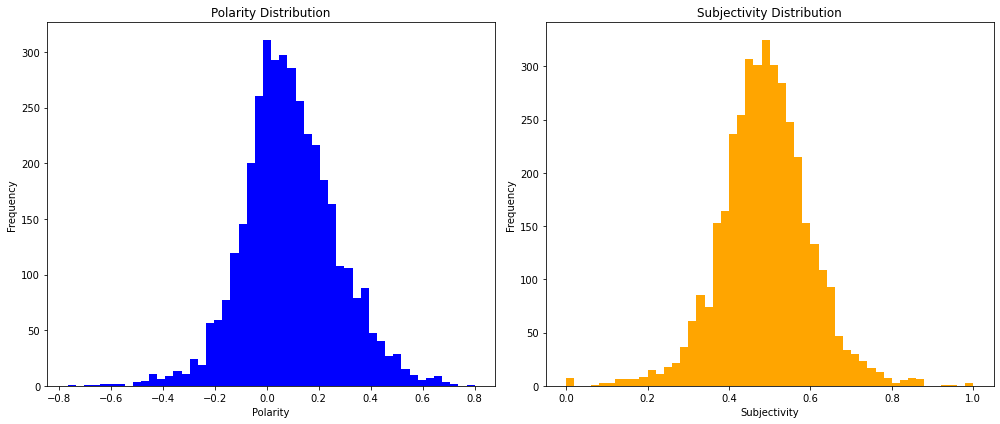

In [35]:
import matplotlib.pyplot as plt

# Plot the polarity and subjectivity
plt.figure(figsize=(14, 6))

# Subplot 1: Polarity Distribution
plt.subplot(1, 2, 1)
plt.hist(data_clean['polarity'], bins=50, color='blue')
plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# Subplot 2: Subjectivity Distribution
plt.subplot(1, 2, 2)
plt.hist(data_clean['subjectivity'], bins=50, color='orange')
plt.title('Subjectivity Distribution')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# visulaising positive and negative reviews

In [36]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [37]:
data_clean

Unnamed: 0                                             review  polarity  \
0              0  ✅ Trip Verified | An excellent flight on BA Ci...  0.353409   
1              1  ✅ Trip Verified |   Crew were amazing and atte...  0.333333   
2              2  Not Verified |  I flew internationally for the... -0.022431   
3              3  ✅ Trip Verified | BA, after subsequent delays ...  0.008514   
4              4  Not Verified |   It is embarrassing to have th...  0.059091   
...          ...                                                ...       ...   
3829        3829  Business LHR to BKK. 747-400. First try back w...  0.047500   
3830        3830  LHR to HAM. Purser addresses all club passenge...  0.173214   
3831        3831  My son who had worked for British Airways urge...  0.143148   
3832        3832  London City-New York JFK via Shannon on A318 b...  0.351667   
3833        3833  SIN-LHR BA12 B747-436 First Class. Old aircraf... -0.018084   

      subjectivity  
0         0.630303  
1         0.620833  
2         0.275833  
3         0.394203  
4         0.331818  
...            ...  
3829      0.541250  
3830      0.428571  
3831      0.282222  
3832      0.446667  
3833      0.529819  

[3834 rows x 4 columns]

In [39]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data_clean['review']:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['✅ Trip Verified | An excellent flight on BA ',
  'CityFlyer. The plane was clean, comfortable ',
  'and spacious. Crew were friendly, and I was ',
  'very pleasantly surprised to be offered a ch',
  'oice of complimentary alcoholic beverages on',
  ' this one hour flight! Departure was on-time',
  ', and I appreciated the cockpit keeping us u',
  'pdated (and encouraging us to enjoy the view',
  's as we came into land at London City). An e',
  'asy and enjoyable flight - just as it should'],
 ['✅ Trip Verified |   Cr',
  'ew were amazing and at',
  'tentive, nothing was m',
  'issed out by them. Wil',
  'l definitely choose BA',
  ' in the future. Also h',
  'ave to praise the food',
  '. The choice was suffi',
  'cient and delicious fo',
  'r a short business fli'],
 ['Not Verified |  I flew internationally for the first time in my life and, because of a delay on their end, missed my connecting flight to my destination. When I asked for help ahead of time, I was told to run to',
 

In [41]:
len(list_pieces[0])

10

In [42]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[1.0,
  0.38333333333333336,
  0.375,
  0.1,
  0.024999999999999994,
  0.0,
  0.2,
  0.4,
  0.0,
  0.5],
 [0.0, 0.6000000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [0.125,
  -0.125,
  -0.065,
  0.0,
  -0.275,
  -0.05555555555555555,
  -0.125,
  0.0,
  0.07999999999999999,
  0.125],
 [0.0,
  0.096875,
  0.6,
  -0.03333333333333333,
  -0.1,
  0.0,
  -0.0875,
  0.011111111111111108,
  -0.11249999999999996,
  0.0],
 [0.0, 0.0, 0.0, -0.05, 0.0, 0.05, 0.0, 0.2, 0.0, 0.0],
 [0.0, -0.6999999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2, 0.0],
 [0.22999999999999998,
  0.0,
  -0.6083333333333333,
  0.0,
  0.0,
  0.39375,
  0.5,
  0.275,
  0.175,
  0.06666666666666665],
 [0.0,
  0.05,
  -0.08333333333333333,
  -0.0675,
  0.025000000000000005,
  0.06895833333333332,
  -0.095,
  0.1,
  -0.18333333333333335,
  0.08181818181818183],
 [-0.10000000000000002,
  0.025,
  -0.21250000000000002,
  0.0,
  -0.08611111111111111,
  -0.08854166666666666,
  0.125,
  0.65,
  0.25,
  -1.0],
 [0.4625, -0.

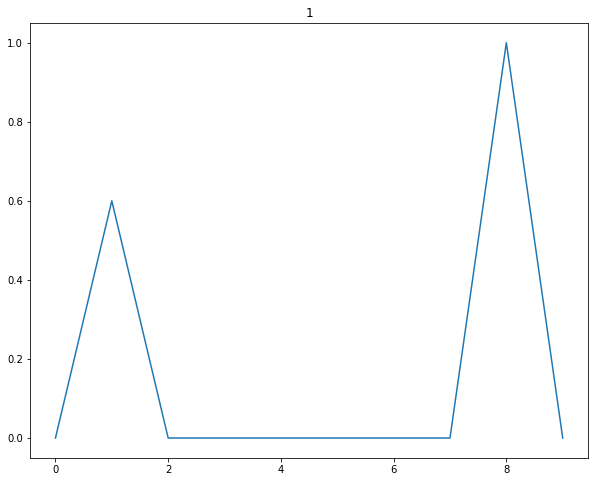

In [43]:
plt.plot(polarity_transcript[1])
plt.title(data_clean.index[1])
plt.show()

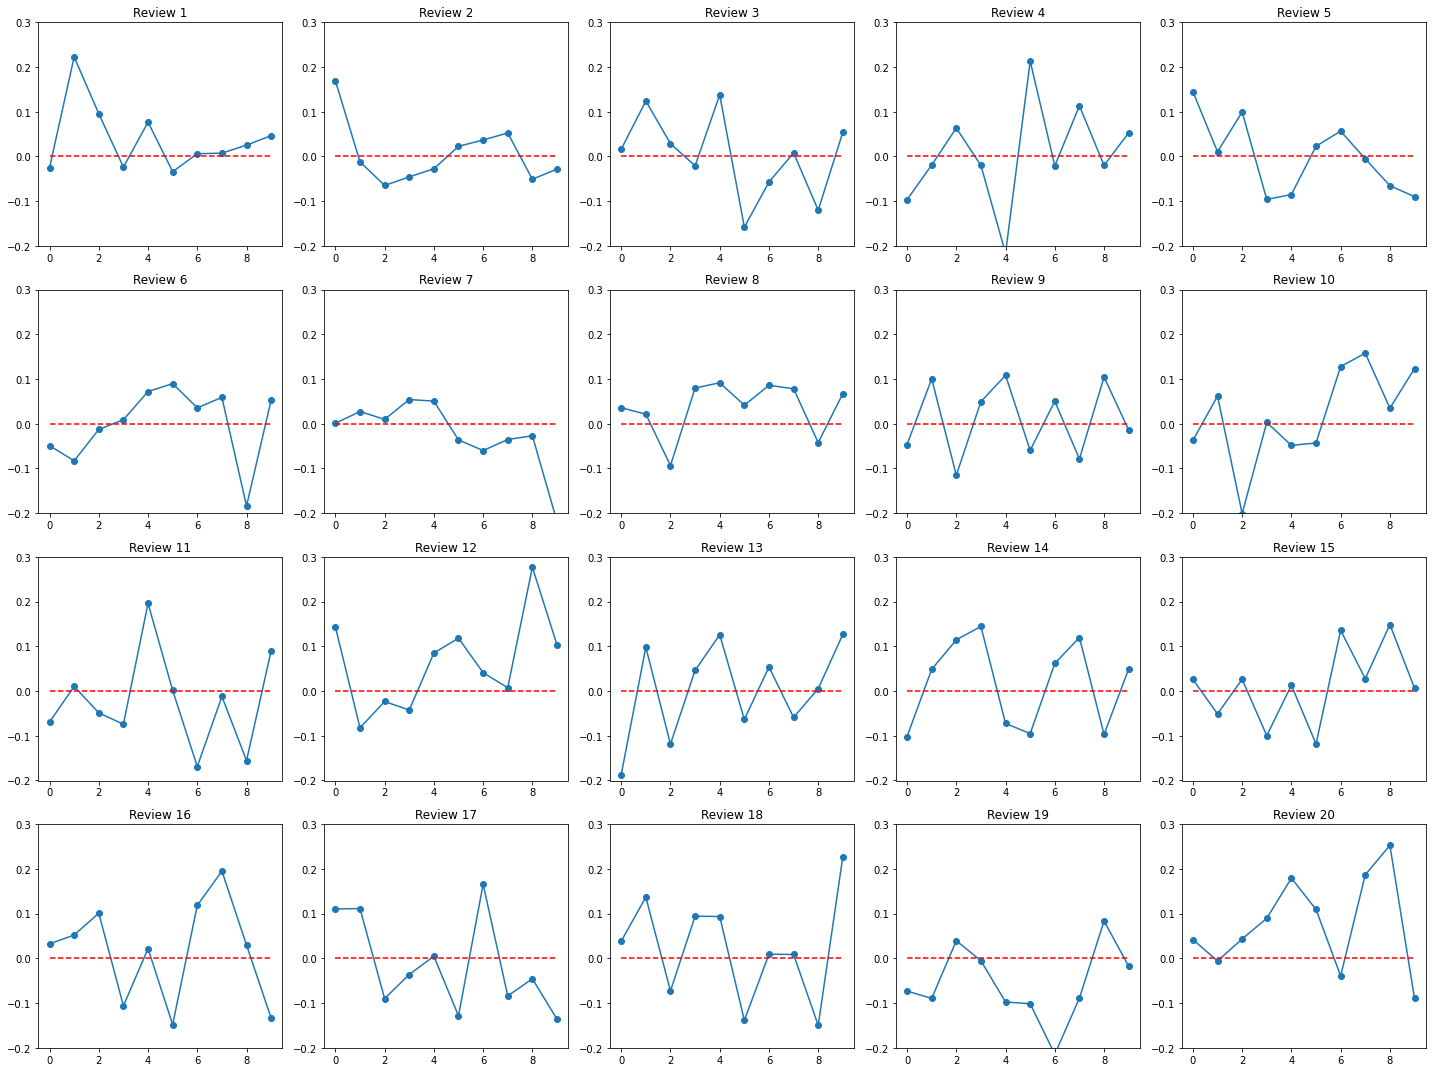

In [48]:
import numpy as np
import matplotlib.pyplot as plt

polarity_transcript = [np.random.randn(10) * 0.1 for _ in range(20)]  

plt.rcParams['figure.figsize'] = [20, 15]  


for index in range(20):    
    plt.subplot(4, 5, index + 1)  
    plt.plot(polarity_transcript[index], marker='o') 
    plt.plot(np.arange(0, 10), np.zeros(10), linestyle='--', color='red')  
    plt.title(f"Review {index + 1}")  
    plt.ylim(ymin=-.2, ymax=.3)  
    
plt.tight_layout()  
plt.show()  


# Topic modelling

In [49]:
import nltk

In [50]:
from gensim import matutils, models
#gives sparse matrix data structures as they are memory efficient
import scipy.sparse

In [56]:
import pandas as pd
import pickle

data = pd.read_pickle('dtm.pkl')
data

00  000  001  0027  0038  004  0053  0055  0058  00am  ...  zoo  zrh  \
0      0    0    0     0     0    0     0     0     0     0  ...    0    0   
1      0    0    0     0     0    0     0     0     0     0  ...    0    0   
2      0    0    0     0     0    0     0     0     0     0  ...    0    0   
3      1    0    0     0     0    0     0     0     0     0  ...    0    0   
4      0    0    0     0     0    0     0     0     0     0  ...    0    0   
...   ..  ...  ...   ...   ...  ...   ...   ...   ...   ...  ...  ...  ...   
3829   0    0    0     0     0    0     0     0     0     0  ...    0    0   
3830   0    0    0     0     0    0     0     0     0     0  ...    0    0   
3831   0    0    0     0     0    0     0     0     0     0  ...    0    0   
3832   0    0    0     0     0    0     0     0     0     0  ...    0    0   
3833   0    0    0     0     0    0     0     0     0     0  ...    0    0   

      zuletzt  zum  zurich  zusammenschluss  zzza  zürich  álex  über  
0           0    0       0                0     0       0     0     0  
1           0    0       0                0     0       0     0     0  
2           0    0       0                0     0       0     0     0  
3           0    0       0                0     0       0     0     0  
4           0    0       0                0     0       0     0     0  
...       ...  ...     ...              ...   ...     ...   ...   ...  
3829        0    0       0                0     0       0     0     0  
3830        0    0       0                0     0       0     0     0  
3831        0    0       0                0     0       0     0     0  
3832        0    0       0                0     0       0     0     0  
3833        0    0       0                0     0       0     0     0  

[3834 rows x 14013 columns]

In [57]:
from gensim import matutils, models
#gives sparse matrix data structures as they are memory efficient
import scipy.sparse

In [58]:
tdm = data.transpose()
tdm.head()

0     1     2     3     4     5     6     7     8     9     ...  3824  \
00       0     0     0     1     0     0     0     0     0     0  ...     0   
000      0     0     0     0     0     0     0     0     0     0  ...     0   
001      0     0     0     0     0     0     0     0     0     0  ...     0   
0027     0     0     0     0     0     0     0     0     0     0  ...     0   
0038     0     0     0     0     0     0     0     0     0     0  ...     0   

      3825  3826  3827  3828  3829  3830  3831  3832  3833  
00       0     0     0     0     0     0     0     0     0  
000      0     0     0     0     0     0     0     0     0  
001      0     0     0     0     0     0     0     0     0  
0027     0     0     0     0     0     0     0     0     0  
0038     0     0     0     0     0     0     0     0     0  

[5 rows x 3834 columns]

In [59]:
sparse_counts = scipy.sparse.csr_matrix(tdm)
#sparse matrix to genism convertible form
corpus = matutils.Sparse2Corpus(sparse_counts)
corpus

In [60]:
cv = pickle.load(open("cv.pkl", "rb"))
#converting in dictionary
id2word = dict((v, k) for k, v in cv.vocabulary_.items())
id2word

{12929: 'trip',
 13481: 'verified',
 5241: 'excellent',
 5681: 'flight',
 1851: 'ba',
 3154: 'cityflyer',
 9489: 'plane',
 3202: 'clean',
 3361: 'comfortable',
 11767: 'spacious',
 3869: 'crew',
 5894: 'friendly',
 9518: 'pleasantly',
 12306: 'surprised',
 8838: 'offered',
 3109: 'choice',
 3467: 'complimentary',
 1297: 'alcoholic',
 2252: 'beverages',
 6659: 'hour',
 4228: 'departure',
 12692: 'time',
 1542: 'appreciated',
 3289: 'cockpit',
 7367: 'keeping',
 13333: 'updated',
 5013: 'encouraging',
 5056: 'enjoy',
 13517: 'views',
 2764: 'came',
 7514: 'land',
 7819: 'london',
 3153: 'city',
 4854: 'easy',
 5057: 'enjoyable',
 7346: 'just',
 1363: 'amazing',
 1733: 'attentive',
 8339: 'missed',
 4145: 'definitely',
 3114: 'choose',
 5970: 'future',
 9675: 'praise',
 5767: 'food',
 12210: 'sufficient',
 4174: 'delicious',
 11361: 'short',
 2685: 'business',
 5668: 'flew',
 7116: 'internationally',
 7696: 'life',
 4163: 'delay',
 5016: 'end',
 3569: 'connecting',
 4296: 'destination',
 

In [61]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.019*"flight" + 0.014*"ba" + 0.012*"food" + 0.011*"seat" + 0.011*"good" + 0.011*"crew" + 0.010*"service" + 0.010*"cabin" + 0.009*"seats" + 0.009*"class"'),
 (1,
  '0.028*"flight" + 0.019*"ba" + 0.010*"british" + 0.010*"airways" + 0.009*"verified" + 0.009*"london" + 0.008*"service" + 0.007*"check" + 0.007*"trip" + 0.007*"told"')]

In [62]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.030*"flight" + 0.019*"ba" + 0.011*"british" + 0.011*"airways" + 0.009*"verified" + 0.009*"london" + 0.008*"told" + 0.008*"service" + 0.008*"hours" + 0.007*"customer"'),
 (1,
  '0.015*"flight" + 0.015*"ba" + 0.012*"food" + 0.012*"seat" + 0.011*"class" + 0.010*"cabin" + 0.010*"service" + 0.010*"crew" + 0.010*"seats" + 0.009*"good"'),
 (2,
  '0.026*"flight" + 0.016*"ba" + 0.012*"time" + 0.011*"good" + 0.010*"service" + 0.010*"crew" + 0.009*"seat" + 0.009*"food" + 0.008*"seats" + 0.008*"check"')]

In [63]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.016*"flight" + 0.014*"good" + 0.013*"seat" + 0.013*"food" + 0.011*"cabin" + 0.011*"crew" + 0.011*"class" + 0.010*"ba" + 0.010*"seats" + 0.009*"service"'),
 (1,
  '0.031*"flight" + 0.019*"ba" + 0.009*"british" + 0.008*"airways" + 0.008*"verified" + 0.008*"london" + 0.008*"told" + 0.008*"hours" + 0.008*"service" + 0.007*"staff"'),
 (2,
  '0.018*"airways" + 0.018*"british" + 0.009*"ba" + 0.008*"airline" + 0.007*"london" + 0.007*"verified" + 0.005*"business" + 0.005*"customer" + 0.005*"travel" + 0.004*"review"'),
 (3,
  '0.022*"flight" + 0.019*"ba" + 0.012*"service" + 0.010*"food" + 0.010*"crew" + 0.009*"time" + 0.009*"seat" + 0.008*"economy" + 0.008*"cabin" + 0.008*"british"')]

# higher topivcs resulting in increased model complexity, also capture more nuances in data